# **1. 분석 주제 및 배경**
- 본 분석의 목적은 사용자가 서비스에서 이탈하는 주요 지점을 파악하고, 인사이트를 기반으로 실행 가능한 개선 방안을 도출하는 데 있다.
---

# **2. 사용한 라이브러리**
---

- **임포트된 라이브러리**:
  - `matplotlib.font_manager`, `matplotlib.pyplot` 및 `seaborn`: 그래프 시각화를 위한 라이브러리
  - `plotly.graph_objects` 및 `plotly.express`: 인터랙티브한 시각화를 위한 라이브러리
  - `pandas`: 데이터프레임 구조를 사용해 데이터 처리에 활용
  - `missingno`: 결측치 시각화를 위한 라이브러리
  - `re` 및 `urllib.parse.urlparse`: 문자열 조작과 URL 파싱을 위한 라이브러리

In [ ]:
import matplotlib.font_manager as fm
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import seaborn as sns
import pandas as pd
import re

from matplotlib.ticker import FuncFormatter
from matplotlib.colors import to_rgb
from urllib.parse import urlparse

plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows

plt.rcParams['axes.unicode_minus'] = False

# **3. 데이터 path 설정**
---

In [ ]:
path = '/Users/dinggyun/Dev/Project/Codeit 중급 프로젝트/주제 1. 국내 채용시장 및 채용 플랫폼 이용패턴 분석/'

# **4. Log 데이터 전처리 및 EDA**
---

## 4-1. 데이터 전처리

- 데이터 로드

In [ ]:
log_2022 = pd.read_csv(path + 'log_2022.csv')
log_2023 = pd.read_csv(path + 'log_2023.csv')

In [ ]:
# log데이터의 결측값을 파악하기 위해 concat
log = pd.concat([log_2022, log_2023], ignore_index=True)

- 기술 통계량

In [ ]:
log.describe(include="all")

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method
count,1.724191e+07,17241907,16597751,17241907,17241907,1.724191e+07,17241907
unique,NaN,21383,2542375,17238717,730,NaN,6
top,NaN,8d37c08c-abb2-4694-9cf3-2c630fc9b005,api/users/id/template,2022-01-05 15:04:08.130541 UTC,2022-02-09,NaN,GET
freq,NaN,384131,1160106,128,136330,NaN,12464696
mean,4.429603e+06,NaN,NaN,NaN,NaN,2.028074e+02,NaN
std,2.684437e+06,NaN,NaN,NaN,NaN,2.111506e+01,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,2.000000e+02,NaN
25%,2.155238e+06,NaN,NaN,NaN,NaN,2.000000e+02,NaN
50%,4.310476e+06,NaN,NaN,NaN,NaN,2.000000e+02,NaN
75%,6.465714e+06,NaN,NaN,NaN,NaN,2.000000e+02,NaN


- 데이터 타입 확인

In [ ]:
log.dtypes

Unnamed: 0        int64
user_uuid        object
URL              object
timestamp        object
date             object
response_code     int64
method           object
dtype: object

- 데이터 크기 확인

In [ ]:
log.shape

(17241907, 7)

- 결측값 확인

/opt/homebrew/Caskroom/miniforge/base/envs/hr/lib/python3.10/site-packages/matplotlib/image.py:181: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


<Figure size 600x400 with 0 Axes>

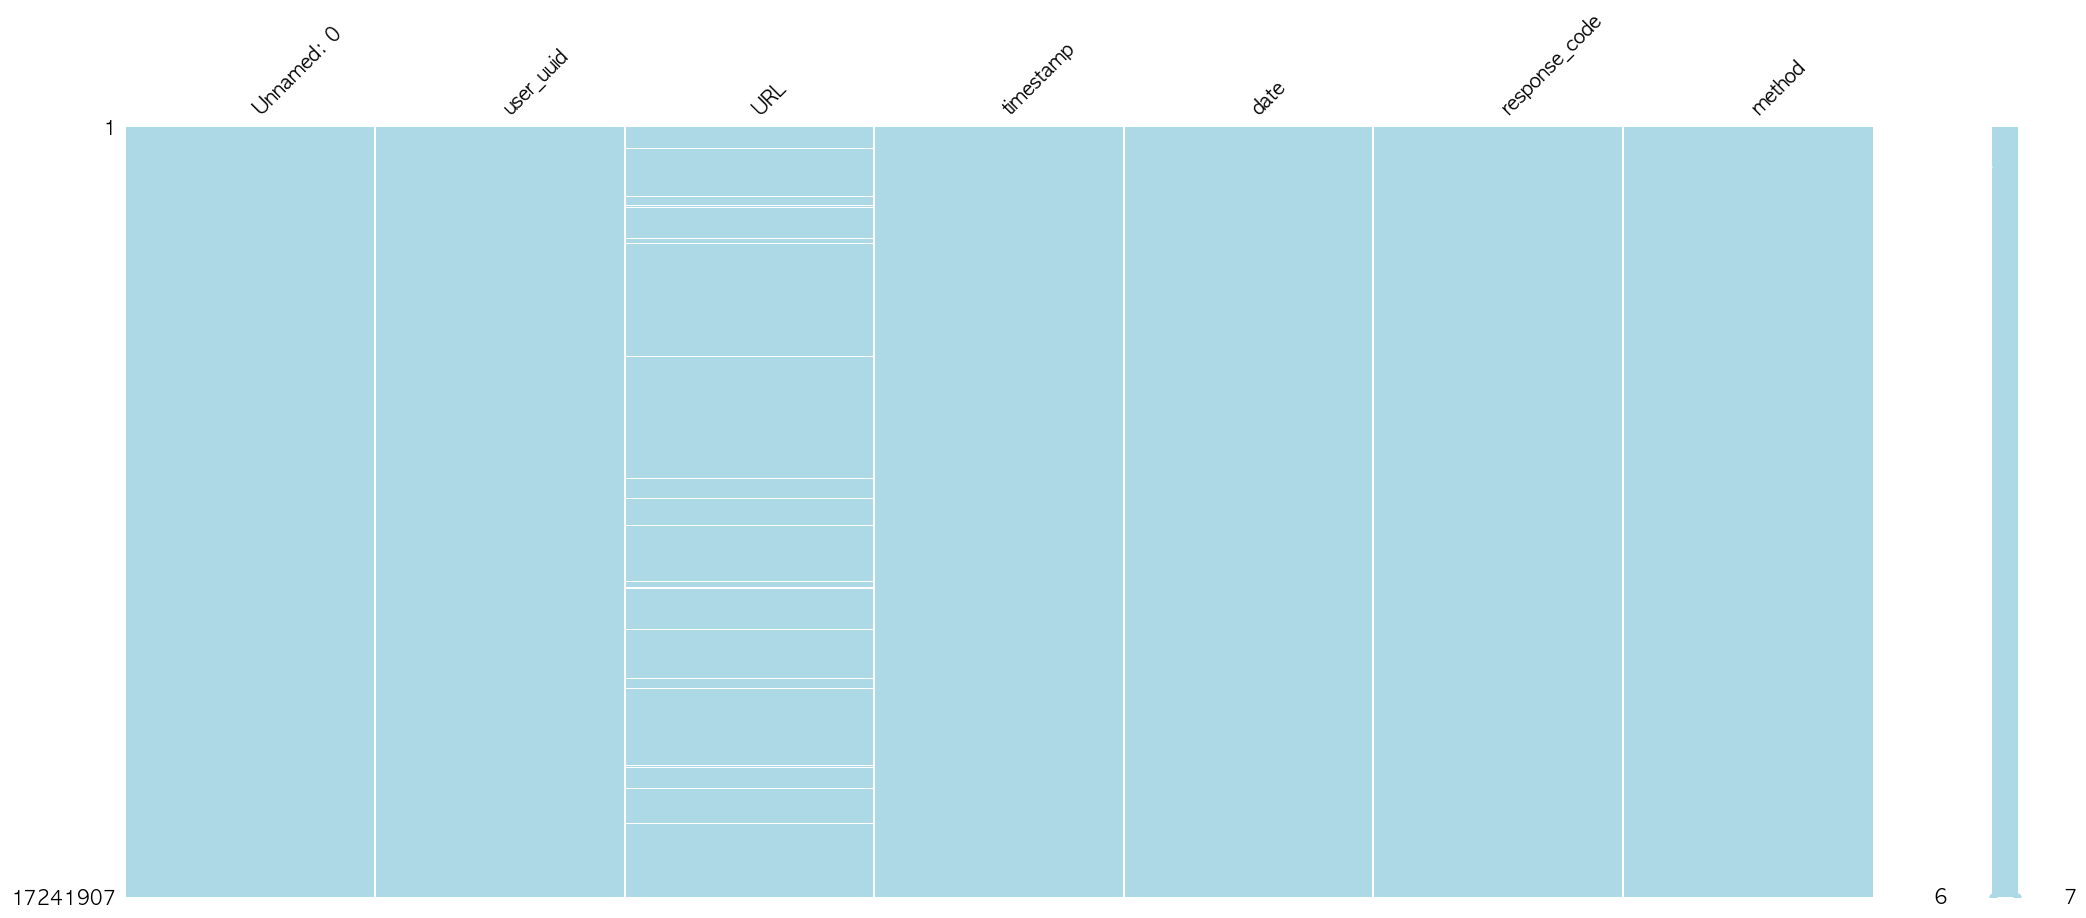

In [ ]:
plt.figure(figsize=(6, 4))
color_rgb = to_rgb('#ADD8E6')  # light blue
msno.matrix(log, color=color_rgb)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('test.png', bbox_inches='tight')
plt.show()

- response_code변수의 고유값 확인

In [ ]:
log['response_code'].unique()

array([200, 400, 302, 404, 500, 409, 401, 405, 503, 403, 301])

- method변수의 고유값 확인

In [ ]:
log['method'].unique()

array(['GET', 'POST', 'PUT', 'DELETE', 'HEAD', 'OPTIONS'], dtype=object)

- user_uuid변수의 고유값 수

In [ ]:
log['user_uuid'].nunique()

21383

- 전처리 전 데이터프레임 확인

In [ ]:
log

,Unnamed: 0,user_uuid,URL,timestamp,date,response_code,method
0,0,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/search/language?name=한국어&_=1655915651225,2022-06-22 16:42:48.247454 UTC,2022-06-23,200,GET
1,1,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/signup/form,2022-06-22 16:19:07.770741 UTC,2022-06-23,200,POST
2,2,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/users/id/template,2022-06-22 16:41:54.449837 UTC,2022-06-23,200,POST
3,3,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/users/id/template,2022-06-23 02:53:47.040932 UTC,2022-06-23,200,POST
4,4,8a7e70cd-1630-4a8a-8303-0706af3a7908,api/users/id/phone/verify/template?_=165591488...,2022-06-22 16:21:58.154299 UTC,2022-06-23,200,GET
...,...,...,...,...,...,...,...
17241902,7187778,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:12:26.780872 UTC,2023-11-14,200,GET
17241903,7187779,167cdb14-d145-4679-b878-66a9a2d32ee9,@user_id,2023-11-14 12:11:38.859562 UTC,2023-11-14,200,GET
17241904,7187780,f5649d90-3016-4747-9924-a05d74ee895e,api/users/id/template,2023-11-14 13:16:19.471324 UTC,2023-11-14,200,POST
17241905,7187781,f5649d90-3016-4747-9924-a05d74ee895e,verify_phone?next_url=/%40kkwangpe,2023-11-14 13:16:11.530244 UTC,2023-11-14,200,GET


> [log 데이터 요약]
- 2022.01.01 ~ 2023.12.31 기간의 데이터

- log데이터는 "`Unnamed: 0`"변수를 제외한 6개의 변수로 구성되어있음

- `user_uuid`는 유저의 고유 식별 ID로 21838명으로 파악됨

- `response_code`의 고유값은 다음과 같이 11개가 존재함, 정수형 타입으로 존재하며 범주형으로 변환이 필요함
    - 200, 400, 302, 404, 500, 409, 401, 405, 503, 403, 301

- `method`의 고유값은 다음과 같이 6개가 존재함
    - 'GET', 'POST', 'PUT', 'DELETE', 'HEAD', 'OPTIONS'

### 4-1-1. Log Processing Class Overview

- 이 `LogProcessing` 클래스는 팀 내에서 로그 데이터 전처리 과정을 통일화하기 위해 설계된 클래스임
- `2022년`과 `2023년`의 로그 데이터를 받아 병합하고, URL 및 타임스탬프와 같은 주요 필드를 전처리하는 과정을 포함하고 있음

- **`__init__` 메서드**: `LogProcessing` 클래스의 초기화 메서드로, `2022년`과 `2023년` 로그 데이터를 인자로 받아 초기화함.

- **`concat_logs` 메서드**: `2022년`과 `2023년` 로그 데이터를 병합하여 결합된 로그 데이터를 반환함. 병합 과정에서 `Unnamed: 0` 컬럼 제거와 URL 결측값을 처리하며, `response_code`가 `200`인 데이터만 필터링함.

- **`vectorized_url_split` 메서드**: URL을 분해하여 `path`와 `query`를 각각 추출하는 메서드임. `URL` 필드를 분석하여 경로(`path`)와 쿼리(`query`) 부분을 분리하여 새로운 컬럼에 추가함.

- **`sort_by_timestamp_with_timezone` 메서드**: `timestamp` 열을 UTC 기준으로 변환하고, +9시간을 추가하여 한국 시간대로 변환한 뒤 시간 순서대로 정렬하는 메서드임. 데이터의 시간대 정렬을 통해 각 로그 이벤트의 흐름을 파악하는 데 유용함.

- **`log_processing` 메서드**: 로그 데이터 병합, URL 분해, 타임스탬프 정렬을 포함한 전처리 과정을 한 번에 수행하는 메서드로, `LogProcessing` 클래스의 주요 기능들을 종합하여 실행함.




In [ ]:
class LogProcessing:
    """
    팀 내 로그 데이터 전처리 과정 통일화를 위한 class
    """
    def __init__(self, log2022=None, log2023=None):
        """
        LogProcessing 클래스의 초기화 메서드

        Parameters:
        - log2022 (DataFrame): 2022년 로그 데이터 (기본값: None)
        - log2023 (DataFrame): 2023년 로그 데이터 (기본값: None)
        """
        self.log2022 = log2022
        self.log2023 = log2023
        self.logs = None

    def concat_logs(self):
        """
        2022년, 2023년 로그 데이터를 병합하고, URL 결측값 제거 및 'Unnamed: 0'컬럼을 제거하는 메서드

        Returns:
        - DataFrame: merge된 로그 데이터 중 response code가 200인 로그 데이터
        """
        print("start concat...")
        # 로그 병합
        self.logs = pd.concat([self.log2022, self.log2023], ignore_index=True)

        # URL 결측값 제거
        self.logs = self.logs.dropna(subset=['URL'])

        # 'Unnamed: 0' 열이 있는지 확인하고, 존재하면 제거
        if 'Unnamed: 0' in self.logs.columns:
            self.logs = self.logs.drop('Unnamed: 0', axis=1)

        # 'response_code' 데이터 타입을 str로 변환
        self.logs['response_code'] = self.logs['response_code'].astype(str)

        # 'response_code'가 200인 데이터만 필터링
        self.logs = self.logs[self.logs['response_code'] == '200']

        print("data concat done...")
        return self.logs

    def vectorized_url_split(self):
        """
        'URL'을 분해하여 'path'와 'query'를 추출하는 메서드

        Returns:
        - DataFrame: 'path'와 'query'가 추가된 로그 데이터.
        """
        print("start url split...")
        parsed_urls = self.logs['URL'].map(urlparse)

        # 'path'와 'query' 분리 후 추가
        self.logs['path'] = [parsed.path for parsed in parsed_urls]
        self.logs['query'] = [parsed.query for parsed in parsed_urls]

        print("url split done...")
        return self.logs

    def sort_by_timestamp_with_timezone(self, timestamp_column='timestamp'):
        """
        'timestamp' 열을 datetime 형식으로 변환하고, UTC를 고려하여 +9시간을 추가하고,
        시간대 순서대로 정렬하는 메서드

        Parameters:
        - timestamp_column (str): 타임스탬프가 저장된 열의 이름 (기본값: 'timestamp').

        Returns:
        - DataFrame: 변환 및 정렬된 로그 데이터.
        """

        print("start timestamp column inverter...")

        # 'timestamp' 컬럼이 object 타입이면 datetime으로 변환
        if self.logs[timestamp_column].dtype == 'object':

            # 조건 추가 - 마이크로초가 없는 데이터에 .000000 추가해서 동일한 형식으로 변경 (re 라이브러리 불러와야함)
            self.logs[timestamp_column] = self.logs[timestamp_column].apply(
                lambda x: re.sub(r'(\d{2}:\d{2}:\d{2}) UTC$', r'\1.000000 UTC', x)
            )

		    # UTC 텍스트 제거 후 datetime으로 변환 (타임존 없이)
            self.logs[timestamp_column] = pd.to_datetime(self.logs[timestamp_column].str.replace(' UTC', ''), errors='coerce')

        # timestamp 컬럼에 +9시간
        self.logs['timestamp'] = self.logs['timestamp'] + pd.to_timedelta(9, unit='hours')

        # 타임스탬프를 기준으로 시간대 순서대로 정렬 (오름차순)
        self.logs = self.logs.sort_values(by=timestamp_column)

        # 인덱스 초기화
        self.logs = self.logs.reset_index(drop=True)

        print("timestamp column inverter done...")
        return self.logs

    # 전처리 한 번에 진행
    def log_processing(self):

        # 로그 병합
        self.concat_logs()

        # URL 분해
        self.vectorized_url_split()

        # 타임스탬프 정렬
        return self.sort_by_timestamp_with_timezone()

- 전처리 진행

In [ ]:
# 불러온 데이터를 LogProcessing 클래스에 전달하여 초기화함
logs = LogProcessing(log2022=log_2022, log2023=log_2023)

# 로그 데이터 병합, URL 분해, 타임스탬프 정렬 전처리 수행
cleaned_logs_df = logs.log_processing()

start concat...
data concat done...
start url split...
url split done...
start timestamp column inverter...
timestamp column inverter done...


- 전처리 후 data type

In [ ]:
cleaned_logs_df.dtypes

user_uuid                object
URL                      object
timestamp        datetime64[ns]
date                     object
response_code            object
method                   object
path                     object
query                    object
dtype: object

- 전처리 후 결측값 확인

In [ ]:
# 결측값 확인
cleaned_logs_df.isnull().sum()

user_uuid        0
URL              0
timestamp        0
date             0
response_code    0
method           0
path             0
query            0
dtype: int64

- 전처리 후 데이터프레임의 형태

In [ ]:
cleaned_logs_df

,user_uuid,URL,timestamp,date,response_code,method,path,query
0,9905a9c4-1584-4e29-ba6c-98be4166b320,api/users/id/template,2022-01-01 00:00:00.532205,2022-01-01,200,POST,api/users/id/template,
1,9ef0c441-cb6a-4a03-b8b0-efcd583ebe26,jobs/id/id_title,2022-01-01 00:00:06.590634,2022-01-01,200,GET,jobs/id/id_title,
2,9ef0c441-cb6a-4a03-b8b0-efcd583ebe26,api/jobs/id/other_jobs?offset=0&limit=5,2022-01-01 00:00:07.049683,2022-01-01,200,GET,api/jobs/id/other_jobs,offset=0&limit=5
3,fe338d08-847b-4a87-8edd-01252ca6523e,@user_id,2022-01-01 00:00:07.497711,2022-01-01,200,GET,@user_id,
4,fe338d08-847b-4a87-8edd-01252ca6523e,api/current_guided_action/id,2022-01-01 00:00:08.262464,2022-01-01,200,POST,api/current_guided_action/id,
...,...,...,...,...,...,...,...,...
16267374,17bea2bb-c87c-488c-9c64-44eb0383c6d6,@user_id,2023-12-31 23:53:38.783822,2023-12-31,200,GET,@user_id,
16267375,17bea2bb-c87c-488c-9c64-44eb0383c6d6,@user_id,2023-12-31 23:53:39.769394,2023-12-31,200,GET,@user_id,
16267376,17bea2bb-c87c-488c-9c64-44eb0383c6d6,api/users/id/template,2023-12-31 23:53:41.821876,2023-12-31,200,POST,api/users/id/template,
16267377,17bea2bb-c87c-488c-9c64-44eb0383c6d6,@user_id,2023-12-31 23:55:11.993901,2023-12-31,200,GET,@user_id,


## 4-2. EDA

### 4-2-1. path별 사용 시기 파악

> timestamp_extraction 함수

`timestamp_extraction` 함수는 전처리된 로그 데이터에서 특정 경로(`path`)별로 호출 횟수와 첫 번째 및 마지막 타임스탬프를 추출하여 로그 데이터의 사용 빈도와 시점을 분석할 수 있도록 하는 함수임

- **파라미터**:
  - `logs (DataFrame)`: 전처리된 로그 데이터가 포함된 데이터프레임
  - `path_column (str)`: 경로 정보가 저장된 열의 이름으로, 기본값은 `'path'`
  - `timestamp_column (str)`: 타임스탬프 정보가 저장된 열의 이름으로, 기본값은 `'timestamp'`

- **기능**:
  - `path`별로 로그 데이터를 그룹화하여 각 경로의 호출 횟수, 첫 번째 호출 시각(`first_used`), 마지막 호출 시각(`last_called`)을 추출함
  - 호출 횟수는 `'path count'` 열로 저장되며, 마지막 호출 시각을 기준으로 오름차순 정렬됨

- **반환값**:
  - 각 `path`별로 호출 빈도와 사용 시점을 나타내는 데이터프레임을 반환하며, 이를 통해 각 경로의 트래픽 분석이 가능함

In [ ]:
def timestamp_extraction(logs, path_column='path', timestamp_column='timestamp'):
    """
    'path'별로 호출 횟수, 첫 번째 및 마지막 타임스탬프를 추출하는 함수

    Parameters:
    - logs (DataFrame): 전처리된 로그 데이터
    - path_column (str): 'path'가 저장된 열의 이름
    - timestamp_column (str): 타임스탬프가 저장된 열의 이름

    Returns:
    - DataFrame: 'path'별로 호출 횟수, 첫 번째 및 마지막 호출 시간 포함
    """
    # 'path'별로 그룹화하여 호출 횟수, 첫 번째 및 마지막 타임스탬프 추출
    path_group = logs.groupby(path_column)[timestamp_column].agg(['count', 'min', 'max']).reset_index()

    # 'first_used', 'last_called', 'path count' 컬럼 추가
    path_group.columns = [path_column, 'path count', 'first_used', 'last_called']

    # 'last_called' 기준으로 내림차순 정렬
    sorted_path_group = path_group.sort_values(by='last_called', ascending=True)

    # sorted_path_group의 인덱스 초기화
    sorted_path_group = sorted_path_group.reset_index(drop=True)

    return sorted_path_group

In [ ]:
log_period = timestamp_extraction(cleaned_logs_df, path_column='path', timestamp_column='timestamp')

In [ ]:
log_period

,path,path count,first_used,last_called
0,tag/id,2,2022-01-15 16:43:33.141080,2022-01-20 10:58:52.749629
1,admin/advertisement,250,2022-01-03 15:48:09.568624,2022-04-27 20:37:07.528165
2,admin/core/profile/id/change,330,2022-01-01 11:47:36.396179,2022-04-27 21:36:45.651470
3,admin/core,21,2022-01-03 14:59:27.421940,2022-04-28 16:25:00.174065
4,admin,3019,2022-01-01 11:03:49.946009,2022-04-28 17:15:37.513633
...,...,...,...,...
234,companies/company_id,629569,2022-01-01 00:00:50.817193,2023-12-31 23:46:19.960704
235,api/companies/id/view,615259,2022-01-01 00:00:51.219985,2023-12-31 23:46:20.283118
236,@user_id/applications,380092,2022-01-01 00:06:20.158599,2023-12-31 23:48:43.713110
237,@user_id,1047428,2022-01-01 00:00:07.497711,2023-12-31 23:55:11.993901


### 4-2-2. 일, 월별 고유 방문자 수 파악
로그 데이터에서 날짜 형식을 변환하고, 일별 및 월별로 고유 방문자 수를 계산하여 트래픽 분석을 수행함


- **날짜 형식 변환**:
  - `cleaned_logs_df['date']` 열을 `datetime` 형식으로 변환함. 오류가 발생하는 경우에는 `NaT`로 처리하여 불필요한 데이터 변환 에러를 방지함

- **일별 고유 방문자 수 계산**:
  - 날짜별로 그룹화하여 `user_uuid`의 고유 수를 계산하고, 이를 `daily_unique_visitors` 데이터프레임에 저장함. 열 이름을 `'date'`, `'daily_unique_visitor_count'`로 지정하여 일별 고유 방문자 수를 확인할 수 있음

- **월별 고유 방문자 수 계산**:
  - 월별로 `user_uuid`의 고유 수를 계산하고, 이를 `monthly_unique_visitors` 데이터프레임에 저장함. 월 데이터를 날짜 형식으로 변환하기 위해 `to_timestamp()`를 사용하여 월 데이터를 일 기준 타임스탬프로 변경함

- **일별 및 월별 평균 방문자 수 계산**:
  - `daily_mean` 변수에 일별 평균 방문자 수를 저장하고, `monthly_mean` 변수에 월별 평균 방문자 수를 저장하여, 전체 트래픽의 평균적인 흐름을 파악할 수 있도록 함

In [ ]:
# 날짜 형식을 datetime으로 변환
cleaned_logs_df['date'] = pd.to_datetime(cleaned_logs_df['date'], errors='coerce')

# 일별 고유 방문자 수 계산
daily_unique_visitors = cleaned_logs_df.groupby('date')['user_uuid'].nunique().reset_index()
daily_unique_visitors.columns = ['date', 'daily_unique_visitor_count']  # 열 이름 지정

# 월별 고유 방문자 수 계산
monthly_unique_visitors = cleaned_logs_df.groupby(cleaned_logs_df['date'].dt.to_period('M'))['user_uuid'].nunique().reset_index()
monthly_unique_visitors.columns = ['month', 'monthly_unique_visitor_count']  # 열 이름 지정

# 월별 데이터를 일 기준으로 변환
monthly_unique_visitors['month'] = monthly_unique_visitors['month'].dt.to_timestamp()

# 일별, 월별 평균 방문자 수 계산
daily_mean = daily_unique_visitors['daily_unique_visitor_count'].mean()
monthly_mean = monthly_unique_visitors['monthly_unique_visitor_count'].mean()


In [ ]:
print(f'단위 기간 내 일 평균 방문자 수: {daily_mean:.2f}명')
print(f'단위 기간 내 월 평균 방문자 수: {monthly_mean:.2f}명')

단위 기간 내 일 평균 방문자 수: 748.20명
단위 기간 내 월 평균 방문자 수: 5551.21명


- 일별 및 월별 고유 방문자 수 시각화

- `Plotly`의 `Figure` 객체를 생성하여 일별 및 월별 고유 방문자 수를 시각화함
- 일별 및 월별 평균선을 추가하여 전체 방문자 추세와 평균 방문자 수를 한눈에 확인할 수 있도록 함

- **일별 고유 방문자 수 라인**:
  - `daily_unique_visitors`의 `'date'`를 x축으로, `'daily_unique_visitor_count'`를 y축으로 하여 일별 고유 방문자 수를 파란색 라인으로 표시

- **월별 고유 방문자 수 라인**:
  - `monthly_unique_visitors`의 `'month'`를 x축으로, `'monthly_unique_visitor_count'`를 y축으로 하여 월별 고유 방문자 수를 주황색 라인으로 표시함

- **일별 평균선**:
  - 일별 방문자 수의 평균인 `daily_mean`을 기준으로 점선 형태의 파란색 평균선을 추가함. 첫 번째 위치에만 평균 값 텍스트(`평균: daily_mean 값`)를 표시하여 평균값을 강조함

- **월별 평균선**:
  - 월별 방문자 수의 평균인 `monthly_mean`을 기준으로 점선 형태의 빨간색 평균선을 추가함. 첫 번째 위치에 평균 값 텍스트(`평균: monthly_mean 값`)를 표시하여, 월별 평균 방문자 수의 중요도를 전달함

In [ ]:
# Figure 객체 생성
fig = go.Figure()

# 일별 고유 방문자 수 라인 추가
fig.add_trace(go.Scatter(
    x=daily_unique_visitors['date'],
    y=daily_unique_visitors['daily_unique_visitor_count'],
    mode='lines',
    name='일별 고유 방문자 수',
    line=dict(color='skyblue')
))

# 월별 고유 방문자 수 라인 추가
fig.add_trace(go.Scatter(
    x=monthly_unique_visitors['month'],
    y=monthly_unique_visitors['monthly_unique_visitor_count'],
    mode='lines',
    name='월별 고유 방문자 수',
    line=dict(color='salmon')
))

# 일별 평균선 추가 + 평균값 텍스트
fig.add_trace(go.Scatter(
    x=daily_unique_visitors['date'],
    y=[daily_mean] * len(daily_unique_visitors),
    mode='lines+text',
    name='일별 평균선',
    line=dict(color='blue', dash='dash'),
    text=[f'평균: {daily_mean:.2f}'] + [''] * (len(daily_unique_visitors) - 1),  # 첫 번째 위치에만 텍스트 표시
    textposition="top left"
))

# 월별 평균선 추가 + 평균값 텍스트
fig.add_trace(go.Scatter(
    x=monthly_unique_visitors['month'],
    y=[monthly_mean] * len(monthly_unique_visitors),
    mode='lines+text',
    name='월별 평균선',
    line=dict(color='red', dash='dash'),
    text=[f'평균: {monthly_mean:.2f}'] + [''] * (len(monthly_unique_visitors) - 1),  # 첫 번째 위치에만 텍스트 표시
    textposition="top left"
))

# 레이아웃 설정
fig.update_layout(
    title='일별 및 월별 고유 방문자 수',
    xaxis_title='날짜',
    yaxis_title='고유 방문자 수',
    template='plotly_white'
)

fig.show()

출력 결과:

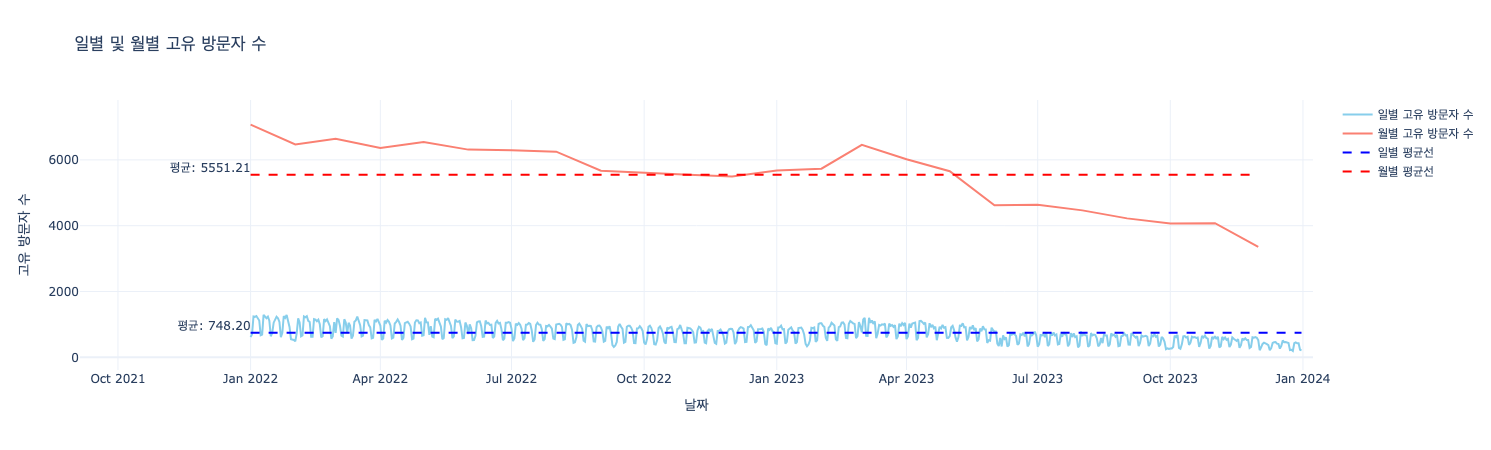

# **5. 퍼널 분석**
---

- 고객 정의: 데이터 수집 기간 내 방문한 유저
- 필터링 : response_code 컬럼 값 200 (정상인 데이터만 집계)

> filter_users_by_path 함수 (퍼널 여정 정의)

- 특정 경로에서 활동한 고유 사용자 ID를 필터링하고, 퍼널 분석을 위해 이들 유저의 로그 데이터를 반환하는 함수임
- 퍼널 여정 내 각 경로를 분석하여 사용자 이동 패턴을 파악하고, 경로별 고유 유저 수와 이들의 로그 데이터를 제공함

- **퍼널 여정 설정**
  1.  **방문 단계**: 2022년 1월 1일부터 2023년 12월 31일까지 사이트를 방문한 고유 사용자 수
  2.  **채용 공고 조회 단계**: 방문한 사용자 중 채용 공고를 조회한 고유 사용자 수이며 측정에 사용 된 URL path는 `jobs`임
  3.  **지원서 제출 단계**: 채용 공고를 조회한 후 지원서를 제출한 고유 사용자 수이며 측정에 사용 된 URL path는 `api/jobs/id/apply/step4`임


- **파라미터**:
  - `log_df (DataFrame)`: 전체 로그 데이터가 포함된 데이터프레임임
  - `paths (str or list of str)`: 퍼널의 특정 단계를 정의하는 경로(또는 경로 리스트)로, 분석할 단계의 경로를 입력받음

- **기능**:
  - `paths`가 단일 경로일 경우 이를 리스트로 변환하여 여러 경로를 일괄 처리할 수 있도록 함
  - 주어진 `paths` 리스트 내에 있는 경로에 대해 필터링 조건(`cond`)을 생성하고, 조건을 만족하는 고유 유저 ID들을 추출하여 `unique_user_ids`에 저장함
  - 각 경로에 대한 고유 유저 수를 출력하여 퍼널 단계별 유저 수를 분석할 수 있도록 지원함
  - `filtered_log`에 필터링된 유저 ID에 해당하는 로그 데이터를 저장하여, 퍼널 여정의 특정 경로에서 발생한 유저 행동을 추적할 수 있음

- **반환값**:
  - `unique_user_ids`: 필터링된 고유 유저 ID 목록으로, 퍼널 단계에서 이탈 또는 진행한 유저 수를 분석하는 데 활용됨
  - `filtered_log`: 필터링된 유저 ID에 해당하는 로그 데이터를 담고 있으며, 각 퍼널 단계에서의 유저 행동을 심층적으로 분석하는 데 사용됨

In [ ]:
def filter_users_by_path(log_df, paths):
    """
    특정 경로들에서 유니크 유저 ID를 필터링하고, 해당 유저의 로그를 반환하는 함수.

    Parameters:
    log_df (DataFrame): 로그 데이터가 포함된 데이터프레임
    paths (str or list of str): 필터링할 경로 또는 경로 리스트

    Returns:
    tuple: 필터링된 유저 ID 목록과 해당 유저의 로그 데이터프레임
    """
    # 경로가 리스트가 아닌 경우 리스트로 변환
    if not isinstance(paths, list):
        paths = [paths]

    # 여러 경로에 대한 조건을 생성
    cond = log_df['path'].isin(paths)

    # 고유 유저 ID 추출
    unique_user_ids = log_df[cond]['user_uuid'].unique()
    print(f'{", ".join(paths)} 고유 유저 수:', len(unique_user_ids))

    # 필터링된 로그 반환
    filtered_log = log_df[log_df['user_uuid'].isin(unique_user_ids)]
    return unique_user_ids, filtered_log

방문에서 지원서 제출까지의 사용자의 퍼널 여정을 정의하고, 각 단계별로 고유 유저 수를 추출하여 퍼널 전환율을 분석함

- **1단계: 방문한 전체 고유 유저 ID 추출**:
  - `cleaned_logs_df`에서 모든 고유 유저 ID를 추출하여 방문자 수를 확인함
  - 방문 단계에서 전체 고유 유저 수를 나타내며, 퍼널의 첫 번째 단계로 사용됨

- **2단계: 채용 공고 조회**:
  - `filter_users_by_path` 함수를 사용하여 `jobs` 경로에 접속한 유저를 필터링함
  - 채용 공고를 조회한 고유 유저 ID 목록과 이들의 로그 데이터를 반환함

- **3단계: 지원서 제출**:
  - `filter_users_by_path` 함수를 다시 사용하여 `job_view_log`에서 `api/jobs/id/apply/step4` 경로에 접속한 유저를 필터링함
  - 지원서를 제출한 유저 수를 추출하여, 퍼널 여정의 마지막 단계로 설정함

- **퍼널 분석 결과 출력**:
  - `funnel_dict`에 각 단계별 유저 수를 저장하고, 이를 출력하여 단계별 고유 유저 수를 확인함
  - 최종적으로 퍼널의 각 단계에서 몇 명의 사용자가 이탈하거나 다음 단계로 진행했는지 시각적으로 확인 가능함

In [ ]:
# 1단계: 방문한 전체 고유 유저 ID 추출
visit_user_ids = cleaned_logs_df['user_uuid'].unique()
print('방문 고유 유저 수:', len(visit_user_ids))

# 2단계: 채용 공고 조회
job_view_user_ids, job_view_log = filter_users_by_path(cleaned_logs_df, ['jobs'])  # GET

# 3단계: 지원서 제출
submission_user_ids, submission_log = filter_users_by_path(job_view_log, ['api/jobs/id/apply/step4'])  # POST

# 결과 출력
funnel_dict = {
    "방문": len(visit_user_ids),
    "채용 공고 조회": len(job_view_user_ids),
    "지원서 제출": len(submission_user_ids),
}

print("\n<퍼널 분석 결과>")
for step, count in funnel_dict.items():
    print(f"{step}: {count}명")

방문 고유 유저 수: 21333
jobs 고유 유저 수: 15687
api/jobs/id/apply/step4 고유 유저 수: 9608

<퍼널 분석 결과>
방문: 21333명
채용 공고 조회: 15687명
지원서 제출: 9608명


### 5-1퍼널 여정 시각화

- 채용 플랫폼의 각 퍼널 단계별 유저 수를 시각화하여 사용자 흐름을 시각적으로 이해할 수 있도록 구성함
- 다양한 퍼널 차트를 사용하여 각 단계에서 이탈하거나 다음 단계로 진행한 유저 수를 한눈에 확인 가능함

- **퍼널 시각화 - 1 (기본 퍼널 차트)**:
  - `plotly.express.funnel` 함수를 이용하여 기본 퍼널 차트를 생성함
  - `funnel_df`에 각 퍼널 단계와 해당 유저 수를 데이터프레임 형태로 저장하여 시각화에 사용함

- **퍼널 시각화 - 2 (퍼널 영역 차트)**:
  - `plotly.express.funnel_area` 함수를 사용해 퍼널을 면적 차트로 표현함
  - `funnel_step`에 각 퍼널 단계 이름, `step_values`에 해당 단계의 유저 수를 저장하여 시각화에 사용함
  - 색상 팔레트는 `px.colors.sequential.Plasma`를 사용해 단계별로 시각적 구분을 줌

- **퍼널 시각화 - 3 (Funnelarea 차트)**:
  - `plotly.graph_objects.Funnelarea`를 이용하여 커스텀 퍼널 영역 차트를 생성함
  - `funnel_step`에 단계 이름, `step_values`에 유저 수를 넣어 차트를 그리며, 투명도(`opacity`)와 테두리 색상을 설정해 시각적 강조를 추가함

In [ ]:
# 퍼널 시각화 - 1
funnel_df = pd.DataFrame({
    "단계": list(funnel_dict.keys()),
    "유저 수": list(funnel_dict.values())
})

fig = go.Figure(go.Funnel(
    x=funnel_df['유저 수'],
    y=funnel_df['단계'],
    textposition="inside",
    textinfo="value+percent initial",
    opacity=0.8,
    marker=dict(
        color=[
            "#1D3557",  # 짙은 파랑
            "#457B9D",   # 중간 파랑
            "#A8DADC",   # 밝은 파랑
            "#F1FAEE",   # 매우 연한 색
            "#F1FAEE",   # 매우 연한 색
            "#F1FAEE"    # 매우 연한 색
        ],
        line=dict(
            width=[4, 2, 2, 3, 1, 1],
            color=["#F1FAEE", "#F1FAEE", "#F1FAEE", "#1D3557", "#1D3557", "#1D3557"]
        )
    ),
    connector=dict(
        line=dict(
            color="#A8DADC",
            dash="dot",
            width=3
        )
    )
))


fig.update_layout(
    title_text='채용 플랫폼 Activation 퍼널',
    title_x=0.5,
    width=800,   # 원하는 폭 (픽셀)
    height=600   # 원하는 높이 (픽셀)
)
# 그래프 보여주기
fig.show()

출력 결과:

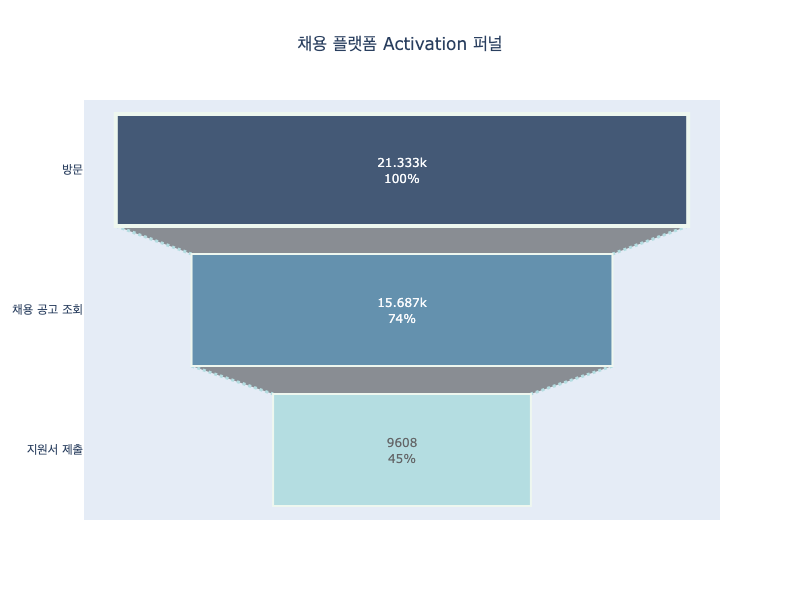

In [ ]:
# 퍼널 시각화 - 2

funnel_step = list(funnel_dict.keys())
step_values = list(funnel_dict.values())

# funnel_area 차트 생성
fig = px.funnel_area(
    names=funnel_step,
    values=step_values,
    title='채용 플랫폼 Activation 퍼널',
    color=funnel_step,  # 색상에 사용할 이름 리스트
    color_discrete_sequence=px.colors.sequential.Plasma  # 색상 팔레트
)

# 차트 레이아웃 설정
fig.update_layout(
    width=800,  # 원하는 폭 (픽셀)
    height=600  # 원하는 높이 (픽셀)
)

fig.show()

출력 결과:

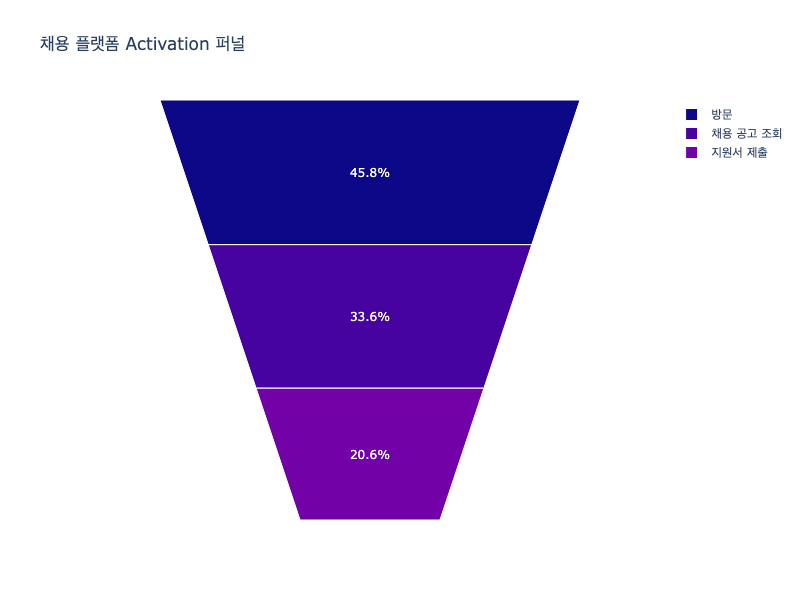

In [ ]:
# 퍼널 시각화 - 3

funnel_step = list(funnel_dict.keys())
step_values = list(funnel_dict.values())

# Funnelarea 차트 생성
fig = go.Figure(go.Funnelarea(
    text=funnel_step,  # 퍼널 단계의 이름
    values=step_values,  # 유저 수
    opacity=0.65,
    marker=dict(
        colors=px.colors.sequential.Plasma,  # 각 단계 색상
        line=dict(
            width=2,
            color="wheat"  # 테두리 색상
        )
    )
))

fig.update_layout(
    title_text='채용 플랫폼 Activation 퍼널',
    title_x=0.5,
    showlegend=False,  # 범례 제거
    width=800,   # 원하는 폭 (픽셀)
    height=600   # 원하는 높이 (픽셀)
)
fig.show()

출력 결과:

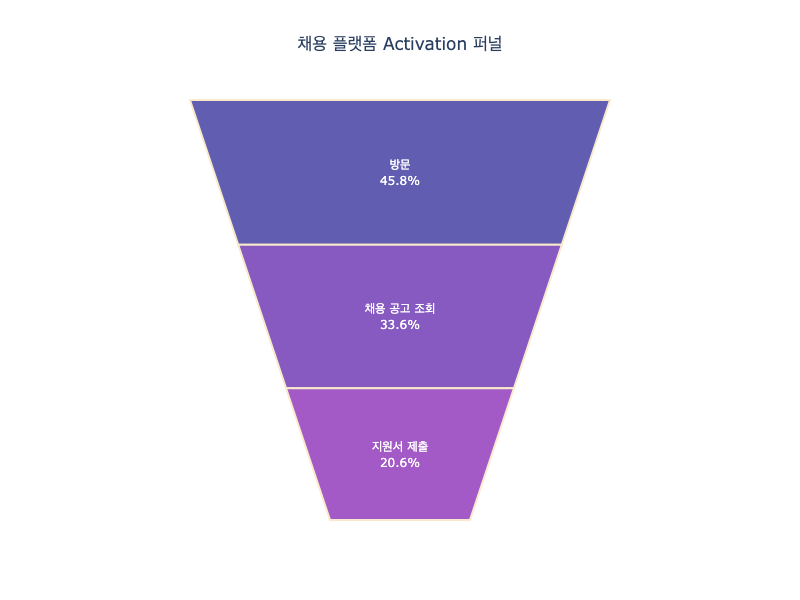

# **6. 추가 분석**
---

"채용 공고 조회 → 지원서 제출" 구간에서 개선 방향을 찾기 위해 추가적인 분석 진행하기로 함

### 6-1. 사용자 path 사용 빈도수

로그 데이터에서 각 `path`의 사용 빈도를 계산하고, 상위 20개의 `path`를 시각화하여 사용자 행동을 파악함

- **query 열에서 상위 20개 `path` 카운트**:
  - `cleaned_logs_df`의 `path` 열에서 상위 20개의 경로를 추출하여, 해당 경로의 사용 빈도를 `query_counts`에 저장함
  - 이를 통해 사용 빈도가 높은 페이지를 파악하여 사용자 관심이 높은 영역을 분석할 수 있음

- **시각화**:
  - `sns.barplot`을 사용하여 상위 20개 `path`의 사용 빈도를 막대그래프로 시각화함
  - x축에 사용 빈도, y축에 `path` 이름을 배치하고, `FuncFormatter`를 사용해 1000단위마다 콤마를 표시하여 가독성을 높임

이 시각화를 통해 사용자들이 자주 접속하는 페이지를 유추할 수 있으며, 이후 퍼널 전환에 영향을 미치는 주요 페이지의 최적화 가능성을 도출하는 데 활용할 수 있음

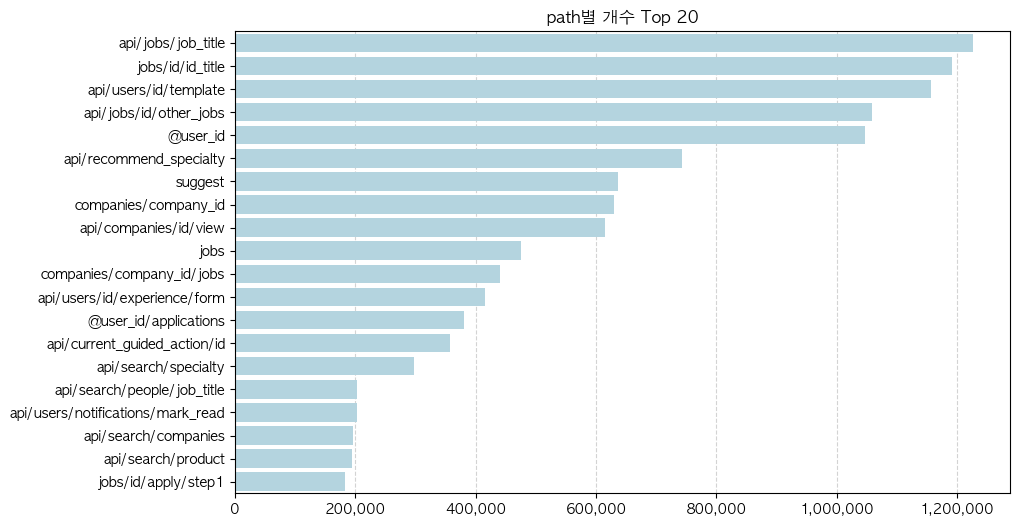

In [ ]:
# query 열에서 상위 20개 카운트
query_counts = cleaned_logs_df['path'].value_counts().head(20)

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=query_counts.values, y=query_counts.index, color='#ADD8E6')
ax.grid(axis='x', linestyle='--', color='lightgray')
ax.set_axisbelow(True)
plt.title('path별 개수 Top 20')
plt.xlabel('')
plt.ylabel('')
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))  # 1000자리마다 콤마
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

- 채용 공고 검색 필터(`api/jobs/job_title`)가 가장 많이 사용된 기능임을 확인

### 6-2. 필터별 지원서 제출 전환율 분석

#### 6-2-1. Conversion Rate By Filter Class Overview

- `ConversionRateByFilter` 클래스는 다양한 필터를 기준으로 채용 공고 조회 유저의 전환율(지원서 제출률)을 분석하는 데 중점을 둠
- 각 필터 항목을 사용한 유저들의 지원서 제출률을 계산하고, 이를 바탕으로 전환율을 파악하여 최적화 방안을 제시하는 데 유용함

- **초기화 메서드 (`__init__`)**:
  - 분석 대상인 로그 데이터(`cleaned_logs_df`)와 채용 공고 조회 유저 ID 목록(`job_view_user_ids`)을 입력받아 초기화함
  - 주요 필터 항목(`keywords`)과 각 필터의 설명(`explain_dict`)을 정의하여, 필터 사용 유저 수와 지원서 제출 유저 수를 상세하게 분석할 수 있도록 함

- **filter_view_user_log 메서드**:
  - `api/jobs/job_title` 경로에 해당하는 유저 로그 중 필터링 조건에 맞는 쿼리를 포함하는 데이터만 추출함
  - 필터링된 `user_uuid`와 `query` 데이터프레임을 반환하여, 필터 사용 현황을 분석할 수 있도록 함

- **group_user_data 메서드**:
  - 각 `user_uuid`별로 필터링된 데이터를 그룹화하여, 각 사용자가 사용한 필터를 표시함
  - 필터 사용 여부를 각 `keyword`로 표시하고, 사용된 키워드를 `words_used` 컬럼에 집합으로 저장하여 필터링 경향을 파악함

- **mark_resume_submissions 메서드**:
  - 지원서 제출 여부를 추가하는 열을 생성함. 특정 경로(`api/jobs/id/apply/step4`)에서 지원서를 제출한 유저를 필터링하여 `resume_submitted` 열에 이력서 제출 여부를 기록함

- **calculate_summary 메서드**:
  - 각 필터에 따라 총 사용자 수, 지원서 제출 유저 수, 전환율(지원서 제출률)을 계산하고 이를 요약 데이터프레임(`summary_df`)에 저장함
  - 필터 설명과 사용률, 지원서 제출률 순위를 포함하여 각 필터의 효율성을 평가함
  - `summary_df`를 통해 각 필터별 전환율 한눈에 볼 수 있음

- **run_analysis 메서드**:
  - 전체 분석을 수행하여 최종 결과 요약(`summary_df`)을 반환함
  - 필터 사용 현황과 지원서 제출율에 관한 전체적인 분석 결과를 요약한 데이터프레임을 출력하여, 필터별 전환율 한눈에 확인 가능함

In [ ]:
class ConversionRateByFilter:
    def __init__(self, cleaned_logs_df, job_view_user_ids):
        """
        초기화 메서드: 데이터와 유저 ID 목록을 받아서 클래스 변수로 저장

        Parameters:
        - cleaned_logs_df (DataFrame): 로그 데이터를 포함하는 DataFrame
        - job_view_user_ids (list or set): 퍼널 분석 대상 user_uuid 리스트 또는 집합
        """
        self.cleaned_logs_df = cleaned_logs_df
        self.job_view_user_ids = job_view_user_ids
        self.keywords = ['job', 'specialty', 'career_type', 'location', 'remote',
                         'language', 'salary', 'stock', 'hiring_types', 'tag', 'sort']
        self.explain_dict = {
            'job': '업무 분야(1~10)',
            'specialty': '활동 분야',
            'location': '지역',
            'remote': '근무 조건(0&1)',
            'language': '언어',
            'salary': '연봉',
            'stock': '스톡 옵션',
            'hiring_types': '고용 형태',
            'tag': '산업',
            'sort': '정렬 기준'
        }

    def filter_view_user_log(self):
        """
        'api/jobs/job_title' 경로와 필터링 조건에 맞는 쿼리만 추출

        Returns:
        - DataFrame: 필터링된 user_uuid와 query가 포함된 DataFrame
        """
        view_user = self.cleaned_logs_df[self.cleaned_logs_df['user_uuid'].isin(self.job_view_user_ids)]
        view_user_log = view_user[view_user['path'] == 'api/jobs/job_title']

        # 필터 이름을 포함하는 행만 선택
        words = '|'.join(self.keywords)
        filtered_df = view_user_log[view_user_log['query'].str.contains(words, na=False)]
        return filtered_df

    def group_user_data(self, filtered_df):
        """
        각 user_uuid별로 필터링된 데이터를 그룹화하고 키워드별로 표시

        Parameters:
        - filtered_df (DataFrame): 필터링된 쿼리 데이터

        Returns:
        - DataFrame: 각 사용자와 키워드 포함 여부를 나타내는 DataFrame
        """
        grouped_data = []
        for user_id, group in filtered_df.groupby('user_uuid'):
            user_data = {'user_uuid': user_id}
            words_found = []

            # '&'로 쿼리 분리 후 키워드 포함 여부 확인
            for query in group['query']:
                for part in query.split('&'):
                    key = part.split('=')[0]
                    if key in self.keywords:
                        user_data[key] = 1
                        words_found.append(key)

            # 키워드가 없었던 경우 열을 0으로 초기화
            for keyword in self.keywords:
                user_data.setdefault(keyword, 0)

            user_data['words_used'] = ', '.join(set(words_found))
            grouped_data.append(user_data)

        return pd.DataFrame(grouped_data)

    def mark_resume_submissions(self, filter_log):
        """
        이력서 제출 여부를 표시하는 열을 추가

        Parameters:
        - filter_log (DataFrame): 필터링된 로그 데이터

        Returns:
        - DataFrame: 이력서 제출 여부가 추가된 DataFrame
        """
        submitted_users = set(self.cleaned_logs_df[self.cleaned_logs_df['path'] == 'api/jobs/id/apply/step4']['user_uuid'])
        filter_log['resume_submitted'] = filter_log['user_uuid'].isin(submitted_users).astype(int)
        return filter_log

    def calculate_summary(self, filter_log):
        """
        각 필터 이름에 따른 총 사용자 수, 지원서 제출한 사용자 수, 지원서 제출률을 계산

        Parameters:
        - filter_log (DataFrame): 필터링된 로그 데이터

        Returns:
        - summary_df (DataFrame): 각 필터 이름의 요약 정보를 포함하는 DataFrame
        """
        summary_df = pd.DataFrame(columns=['필터 이름', '필터 사용 유저 수', '지원서 제출 유저 수', '지원서 제출률'])

        for filter_col in self.keywords:
            total_users = filter_log[filter_col].sum()
            submitted_applications = filter_log[(filter_log[filter_col] == 1) & (filter_log['resume_submitted'] == 1)].shape[0]
            conversion_rate = submitted_applications / total_users

            new_row = pd.DataFrame({
                '필터 이름': [filter_col],
                '필터 사용 유저 수': [total_users],
                '지원서 제출 유저 수': [submitted_applications],
                '지원서 제출률': [conversion_rate]
            })
            summary_df = pd.concat([summary_df, new_row], ignore_index=True)

        # 설명 및 추가 열 계산
        summary_df['필터 설명'] = summary_df['필터 이름'].map(self.explain_dict)
        summary_df['채용공고 조회 유저 수'] = [len(self.job_view_user_ids) for _ in range(summary_df.shape[0])]
        summary_df['필터 사용률'] = summary_df['필터 사용 유저 수'] / summary_df['채용공고 조회 유저 수']
        summary_df['지원서 제출률 순위'] = summary_df['지원서 제출률'].rank(ascending=False, method='min').astype(int)
        summary_df['필터 사용률 순위'] = summary_df['필터 사용률'].rank(ascending=False, method='min').astype(int)

        # 컬럼 순서 재정렬
        summary_df = summary_df[['필터 이름', '필터 설명', '채용공고 조회 유저 수', '필터 사용 유저 수',
                                 '필터 사용률', '필터 사용률 순위', '지원서 제출 유저 수', '지원서 제출률',
                                 '지원서 제출률 순위']]

        return summary_df

    def run_analysis(self):
        """
        전체 분석을 실행 및 최종 결과 요약

        Returns:
        - summary_df (DataFrame): 최종 요약 결과를 포함하는 DataFrame
        """
        filtered_df = self.filter_view_user_log()
        filter_log = self.group_user_data(filtered_df)
        filter_log = self.mark_resume_submissions(filter_log)
        summary_df = self.calculate_summary(filter_log)
        return summary_df

- filter_view_user_log: 필터링 조건이 포함된 쿼리만 추출하여 데이터 분석의 기초 데이터를 생성
- group_user_data: 각 사용자별로 필터 조건을 사용했는지 여부를 체크하고 정리
- mark_resume_submissions: 사용자별 지원서 제출 여부를 데이터에 추가하여 전환율 분석에 사용
- calculate_summary: 필터 조건별 사용자 수, 지원서 제출 수, 전환율을 계산하여 요약 정보를 생성
- run_analysis: 모든 전처리와 분석을 순차적으로 실행하여 최종 요약 데이터를 반환

In [ ]:
# - cleaned_logs_df (DataFrame): 로그 데이터를 포함하는 DataFrame
# - job_view_user_ids (list or set): 퍼널 분석 대상 user_uuid 리스트 또는 집합
funnel_analysis = ConversionRateByFilter(cleaned_logs_df, job_view_user_ids)
summary_df = funnel_analysis.run_analysis()
summary_df

/var/folders/lb/80g3vygs31z9yblw4jht2q4m0000gn/T/ipykernel_38305/933764134.py:111: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,필터 이름,필터 설명,채용공고 조회 유저 수,필터 사용 유저 수,필터 사용률,필터 사용률 순위,지원서 제출 유저 수,지원서 제출률,지원서 제출률 순위
0,job,업무 분야(1~10),15687,12204,0.777969,1,8234,0.674697,11
1,specialty,활동 분야,15687,5670,0.361446,4,4313,0.760670,5
2,career_type,NaN,15687,7892,0.503092,2,6132,0.776989,4
3,location,지역,15687,5882,0.37496,3,4442,0.755185,6
4,remote,근무 조건(0&1),15687,1031,0.065723,10,727,0.705141,9
5,language,언어,15687,534,0.034041,11,452,0.846442,1
6,salary,연봉,15687,1458,0.092943,7,1004,0.688615,10
7,stock,스톡 옵션,15687,1071,0.068273,9,763,0.712418,8
8,hiring_types,고용 형태,15687,1453,0.092624,8,1069,0.735719,7
9,tag,산업,15687,4283,0.273029,6,3350,0.782162,3


#### 6-2-2. 필터 사용률 시각화
각 필터의 사용률을 바그래프로 표현하여, 사용자들이 어떤 필터 항목을 자주 사용하는지 시각적으로 확인할 수 있도록 함

- **정렬 및 데이터 준비**:
  - `summary_df`를 `필터 사용률` 기준으로 내림차순 정렬하여, 사용률이 높은 순서대로 필터를 나열함
  - 정렬된 데이터를 `sorted_df1`에 저장하여 바그래프에 사용함

- **시각화 설정**:
  - `sns.barplot`을 사용하여 x축에 `필터 사용률`, y축에 `필터 이름`을 배치함
  - x축의 범위를 0에서 1로 설정하고, 20% 간격으로 눈금을 표시하여 사용률을 직관적으로 확인할 수 있도록 함

- **그래프 제목 및 레이아웃**:
  - `plt.tight_layout()`을 사용하여 레이아웃을 최적화하여, 그래프가 잘려서 표시되지 않도록 함

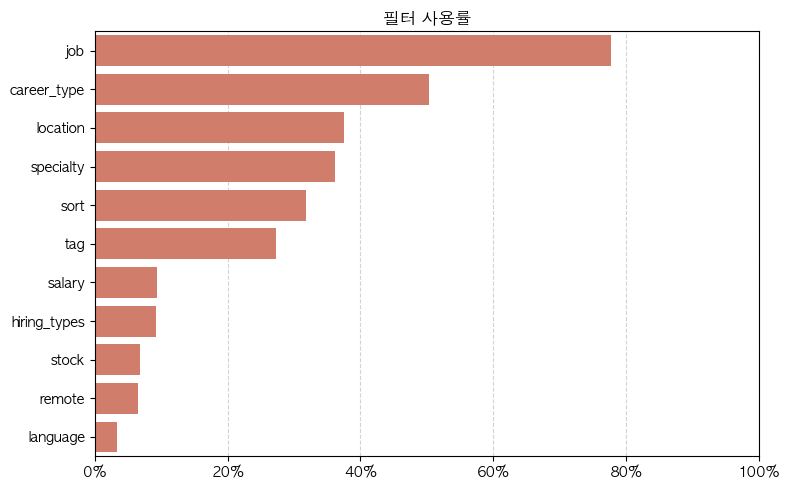

In [ ]:
# 필터 사용률 바그래프 시각화
sorted_df1 = summary_df.sort_values(by='필터 사용률', ascending=False)

plt.figure(figsize=(8, 5))

# sns.barplot(x='필터 사용률', y='필터 이름', data=sorted_df, palette='Greens', hue='필터 이름')
ax = sns.barplot(x='필터 사용률', y='필터 이름', data=sorted_df1, color='#E2725B')
ax.grid(axis='x', linestyle='--', color='lightgray')
ax.set_axisbelow(True)
plt.title('필터 사용률')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 1)  # x축 범위를 0% ~ 100%로 설정
plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['0%', '20%', '40%', '60%', '80%', '100%'])

plt.tight_layout()
plt.show()

#### 6-2-3. 지원서 제출률 시각화
각 필터 항목에 대한 지원서 제출률을 바그래프로 표현하여, 특정 필터 항목을 사용한 유저들의 전환율을 시각적으로 분석함

- **정렬 및 데이터 준비**:
  - `summary_df`를 `지원서 제출률` 기준으로 내림차순 정렬하여, 전환율이 높은 순서대로 필터를 나열함
  - 정렬된 데이터를 `sorted_df2`에 저장하여 바그래프에 사용함

- **시각화 설정**:
  - `sns.barplot`을 사용하여 x축에 `지원서 제출률`, y축에 `필터 이름`을 배치함
  - x축의 범위를 0에서 1로 설정하고, 20% 간격으로 눈금을 표시하여 전환율을 직관적으로 확인할 수 있도록 함

- **그래프 제목 및 레이아웃**:
  - `plt.tight_layout()`을 사용하여 레이아웃을 최적화하여, 그래프가 잘려서 표시되지 않도록 함.

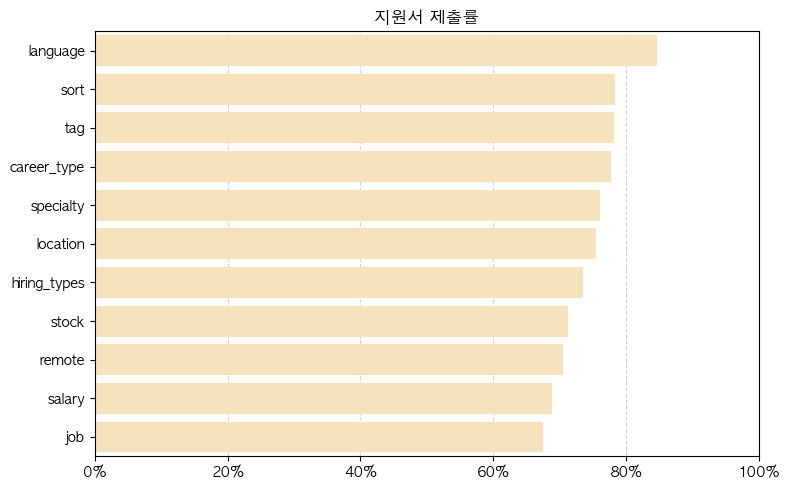

In [ ]:
# 지원서 제출률 바그래프 시각화
sorted_df2 = summary_df.sort_values(by='지원서 제출률', ascending=False)

plt.figure(figsize=(8, 5))

# sns.barplot(x='지원서 제출률', y='필터 이름', data=sorted_df, palette='Blues', hue='필터 이름')
ax = sns.barplot(x='지원서 제출률', y='필터 이름', data=sorted_df2, color='#FFE5B4')
ax.grid(axis='x', linestyle='--', color='lightgray')
ax.set_axisbelow(True)

plt.title('지원서 제출률')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 1)  # x축 범위를 0% ~ 100%로 설정
plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['0%', '20%', '40%', '60%', '80%', '100%'])

plt.tight_layout()
plt.show()

### 6-3. 필터 조건 및 지원서 제출 여부에 따른 월별 고유 유저 수 및 전환율 계산
필터 조건을 적용한 유저와 지원서를 제출한 유저 수를 월별로 분석하고, 각 월별 전환율을 계산하여 필터 사용과 전환율 간의 상관관계를 파악하기 위한 준비 작업을 수행함

- **날짜 형식 변환**:
  - `date` 컬럼을 `datetime` 형식으로 변환하여 날짜 관련 연산에 용이하게 함

- **필터를 사용한 유저와 지원서 제출 유저 추출**:
  - 필터 조건(`filter_items`)을 사용한 유저와 `api/jobs/job_title` 경로에 접근한 유저를 `filtered_users_cleaned_logs_df`에 저장
  - `api/jobs/id/apply/step4` 경로에 해당하는 유저, 즉 지원서를 제출한 유저를 `applied_users_cleaned_logs_df`에 저장

- **월별 고유 유저 수 계산**:
  - `filtered_users_cleaned_logs_df`를 사용하여 각 월별 필터를 사용한 고유 유저 수를 계산하고 `monthly_filtered_users`에 저장
  - `applied_users_cleaned_logs_df`와 필터 사용 유저 목록을 기준으로, 지원서를 제출한 유저 중 필터를 사용한 유저의 월별 고유 수를 `monthly_applied_users`에 저장

- **전환율 계산**:
  - `monthly_filtered_users`와 `monthly_applied_users`를 병합하여 전환율을 계산하고, 결과는 `monthly_data`에 저장
  - `전환율`은 `지원서 제출 유저 수 / 필터를 사용한 유저 수 * 100`으로 계산하여 퍼센트 형식으로 나타냄

이 데이터는 필터 사용 유저와 지원서 제출 유저 간의 월별 전환율 변화를 시각화하는 데 사용할 수 있으며, 시각적 분석을 통해 월별 전환율를 파악하고 최적화할 수 있는 시점을 식별할 수 있음

In [ ]:
# datetime 형식으로 변환
cleaned_logs_df['date'] = pd.to_datetime(cleaned_logs_df['date'])

# 필터 조건 및 지원서 제출 여부를 정의
filter_items = ['job', 'specialty', 'career_type', 'location', 'remote', 'language', 'salary', 'stock', 'hiring_types', 'tag', 'sort']

# 필터를 사용한 유저 추출
filtered_users_cleaned_logs_df = cleaned_logs_df[
    (cleaned_logs_df['path'] == 'api/jobs/job_title') &
    (cleaned_logs_df['query'].str.contains('|'.join(filter_items), case=False, na=False))
]

# 지원서를 제출한 유저 추출
applied_users_cleaned_logs_df = cleaned_logs_df[cleaned_logs_df['path'] == 'api/jobs/id/apply/step4']

# 월별 고유 유저 수 계산 (필터 사용한 유저)
monthly_filtered_users = filtered_users_cleaned_logs_df.groupby(filtered_users_cleaned_logs_df['date'].dt.to_period('M'))['user_uuid'].nunique().reset_index()
monthly_filtered_users.columns = ['월', '필터를 사용한 유저 수']

# 월별 고유 유저 수 계산 (지원서 제출한 유저 중 필터를 사용한 유저)
monthly_applied_users = applied_users_cleaned_logs_df[applied_users_cleaned_logs_df['user_uuid'].isin(filtered_users_cleaned_logs_df['user_uuid'])]\
    .groupby(applied_users_cleaned_logs_df['date'].dt.to_period('M'))['user_uuid'].nunique().reset_index()
monthly_applied_users.columns = ['월', '지원서 제출 유저 수']

# 두 개의 데이터프레임을 병합하여 전환율 계산
monthly_data = pd.merge(monthly_filtered_users, monthly_applied_users, on='월', how='left')
monthly_data['전환율'] = (monthly_data['지원서 제출 유저 수'] / monthly_data['필터를 사용한 유저 수']) * 100

In [ ]:
monthly_data

,월,필터를 사용한 유저 수,지원서 제출 유저 수,전환율
0,2022-01,2130,724,33.990610
1,2022-02,1965,699,35.572519
2,2022-03,2049,752,36.700830
3,2022-04,1879,750,39.914848
4,2022-05,1968,720,36.585366
5,2022-06,1836,637,34.694989
6,2022-07,1818,615,33.828383
7,2022-08,1828,637,34.846827
8,2022-09,1709,583,34.113517
9,2022-10,1720,583,33.895349


In [ ]:
print(f"월 평균 전환율: {monthly_data['전환율'].mean():.2f}%")
print(f"월 평균 필터 사용 유저 수: {monthly_data['필터를 사용한 유저 수'].mean():.2f}명")

월 평균 전환율: 36.82%
월 평균 필터 사용 유저 수: 1986.62명


##### 6-3-1. 월별 필터 사용 유저 수, 지원서 제출 유저 수 및 전환율 시각화
월별 필터를 사용한 유저 수, 지원서 제출 유저 수, 그리고 전환율을 한 그래프에 함께 표시하여 세 가지 지표 간의 관계를 시각적으로 분석함

- **데이터 형식 변환**:
  - `월` 컬럼을 문자열 형식으로 변환하여 그래프의 x축에 월 단위 데이터가 잘 표시되도록 함

- **Figure 객체 생성 및 시각화 구성**:
  - `go.Figure()` 객체를 생성하여 시각화 준비
  - `go.Bar`로 필터를 사용한 유저 수와 지원서 제출 유저 수를 막대 그래프로 추가하여, 각 월별로 필터 사용 및 지원서 제출 유저 수의 분포를 비교할 수 있도록 함
  - `go.Scatter`를 사용해 꺾은선 그래프로 전환율을 추가하고, 전환율 값은 소수점 두 자리까지 텍스트로 표시하여 정확한 값을 제공함

- **레이아웃 및 축 설정**:
  - `yaxis`는 유저 수, `yaxis2`는 전환율(%)로 설정하여 두 가지 지표가 한 그래프에서 별도로 표시되도록 함
  - `barmode='group'`을 사용하여 두 막대를 나란히 배치하고, 전환율 꺾은선은 독립적인 y축을 가지도록 하여 그래프 해석을 쉽게 함

In [ ]:
# '월' 컬럼을 문자열 형식으로 변환
monthly_data['월'] = monthly_data['월'].astype(str)

# Figure 객체 생성
fig = go.Figure()

# 필터 사용 유저 수 막대 그래프 추가
fig.add_trace(go.Bar(
    x=monthly_data['월'],
    y=monthly_data['필터를 사용한 유저 수'],
    name='필터를 사용한 유저 수',
    marker_color='skyblue'
))

# 지원서 제출 유저 수 막대 그래프 추가
fig.add_trace(go.Bar(
    x=monthly_data['월'],
    y=monthly_data['지원서 제출 유저 수'],
    name='지원서 제출 유저 수',
    marker_color='salmon'
))

# 전환율 꺾은선 그래프 추가 (텍스트로 전환율 표시)
fig.add_trace(go.Scatter(
    x=monthly_data['월'],
    y=monthly_data['전환율'],
    mode='lines+markers+text',
    name='전환율 (%)',
    text=monthly_data['전환율'].round(2),  # 소수점 2자리까지 표시
    textposition="top center",
    yaxis='y2',
    line=dict(color='darkblue')
))

# 레이아웃 설정
fig.update_layout(
    title='월별 필터 사용 유저 수, 지원서 제출 유저 수 및 전환율',
    xaxis_title='월',
    yaxis_title='유저 수',
    yaxis2=dict(title='전환율 (%)', overlaying='y', side='right'),  # 두 번째 Y축 설정
    barmode='group',  # 막대를 나란히 배치
    legend_title_text='지표'
)

# 그래프 출력
fig.show()

출력 결과:

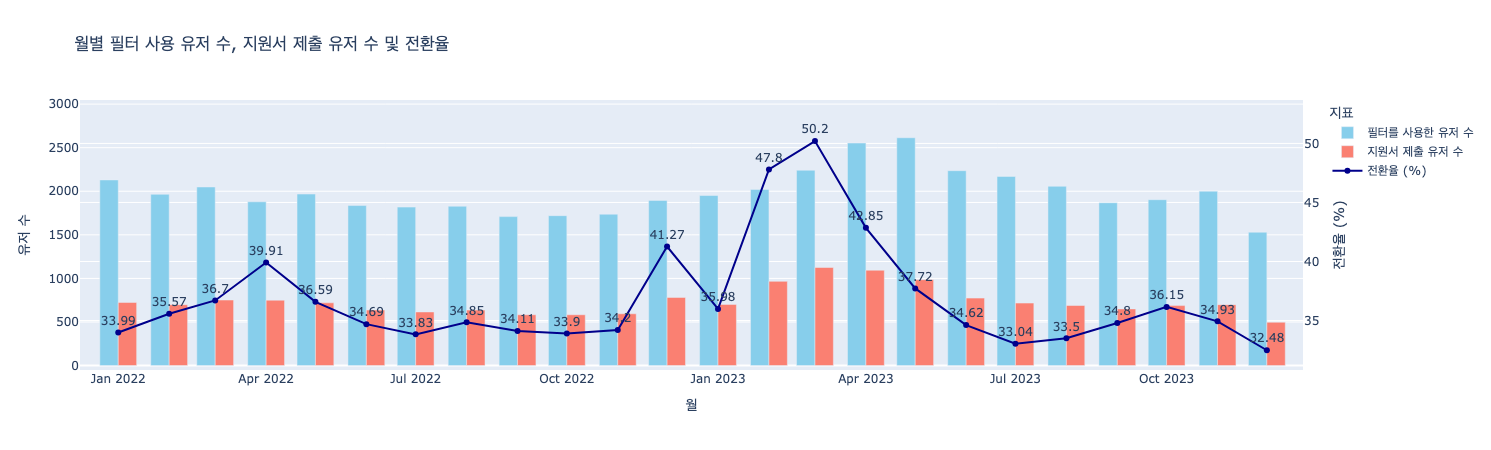

### 6-4. 각 필터 조건에 따른 채용 공고 조회 및 지원서 제출 전환율

> 필터 조건별 전환율 및 필터링 선호도 계산 함수

로그 데이터를 기반으로 각 필터 조건에 따른 채용 공고 조회 및 지원서 제출 전환율을 계산하고, 필터링 선호도를 산출하여 반환함

- **Parameters**:
  - `cleaned_logs_df` (DataFrame): 전체 로그 데이터를 포함하는 DataFrame
  - `filter_items` (list of str): 분석할 필터 조건 목록

- **Returns**:
  - `results_df` (DataFrame): 각 필터 조건에 따른 채용 공고 조회 유저 수, 지원서 제출 유저 수, 전환율, 필터링 선호도를 포함하는 결과 DataFrame

- 함수 동작 설명

1. **채용 공고 조회 유저 수 계산**:
   - `jobs/id/id_title` 경로에 접근한 전체 유저 수를 `total_unique_job_view_users`로 저장하여, 필터링 선호도 계산의 기준으로 사용함

2. **각 필터 조건에 대한 유저 필터링**:
   - 필터 조건이 포함된 쿼리(`api/jobs/job_title`)를 조회한 유저를 필터링
   - 각 필터 조건에 맞는 유저의 고유 ID와 로그 데이터를 추출함

3. **유저 수 및 전환율 계산**:
   - 필터 조건을 적용한 유저 수, 지원서를 제출한 유저 수를 계산하여 각 조건별 전환율을 산출함
   - 전환율은 `(지원서 제출 유저 수 / 필터링된 유저 수) * 100`으로 계산하여 백분율로 표시함

4. **필터링 선호도 계산**:
   - 필터 조건별 유저 수를 전체 조회 유저 수로 나누어 각 필터의 선호도를 산출하고, 결과를 `%`로 표현함
이 함수의 결과는 필터별 전환율 및 선호도를 시각화하여 각 필터가 전환에 미치는 영향력을 분석할 때 유용함

In [ ]:
def filter_analysis(cleaned_logs_df, filter_items):
    """
    각 필터 조건에 따른 채용 공고 조회 및 지원서 제출 전환율을 계산하여 반환하는 함수

    Parameters:
    - cleaned_logs_df (DataFrame): 로그 데이터가 포함된 DataFrame
    - filter_items (list of str): 필터링할 조건 목록

    Returns:
    - results_df (DataFrame): 각 필터 조건에 따른 조회 유저 수, 지원서 제출 유저 수, 전환율, 필터링 선호도를 포함하는 DataFrame
    """
    # 결과를 저장할 리스트
    results = []

    # 채용 공고 조회 전체 유저 수 (path가 'jobs/id/id_title'인 유저 수)
    total_unique_job_view_users = cleaned_logs_df[cleaned_logs_df['path'] == 'jobs/id/id_title']['user_uuid'].nunique()

    # 각 필터 조건별로 분석 수행
    for item in filter_items:
        # 'api/jobs/job_title' 경로를 가진 유저 필터링
        item_users = cleaned_logs_df[cleaned_logs_df['URL'] == 'jobs']['user_uuid'].unique()
        filtered_df = cleaned_logs_df[cleaned_logs_df['user_uuid'].isin(item_users)].reset_index(drop=True)

        # 필터링 조건에 맞는 유저 필터링
        item_filtered_users = filtered_df[(filtered_df['path'] == 'api/jobs/job_title') &
                                          (filtered_df['query'].str.contains(item, na=False))]['user_uuid'].unique()

        # 필터 조건이 포함된 유저의 로그 데이터 추출
        item_filtered_df = filtered_df[filtered_df['user_uuid'].isin(item_filtered_users)].reset_index(drop=True)

        # 필터 조건에 맞는 유저 수 계산
        item_filtered_count = len(item_filtered_df['user_uuid'].unique())

        # 지원서를 제출한 유저 수 계산
        item_filtered_apply_count = item_filtered_df[item_filtered_df['path'] == 'api/jobs/id/apply/step4']['user_uuid'].nunique()

        # 전환율 계산
        conversion_rate = (item_filtered_apply_count / item_filtered_count * 100) if item_filtered_count > 0 else 0

        # 결과 추가
        results.append({
            '필터링 조건': item,
            '채용 공고를 조회한 고유 유저 수 (전체)': total_unique_job_view_users,
            '채용 공고를 조회한 유저 수': item_filtered_count,
            '지원서 제출 유저 수': item_filtered_apply_count,
            '전환율 (%)': round(conversion_rate, 2)
        })

    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)

    # 필터링 선호도 계산 및 소수점 둘째 자리까지 반올림
    results_df['필터링 선호도 (%)'] = (results_df['채용 공고를 조회한 유저 수'] / results_df['채용 공고를 조회한 고유 유저 수 (전체)'] * 100).round(2)

    return results_df

In [ ]:
# 필터 keyword 정의
filter_items = ['job', 'specialty', 'career_type', 'location', 'remote', 'language', 'salary', 'stock', 'hiring_types', 'tag', 'sort']

# 함수 호출
results_df = filter_analysis(cleaned_logs_df, filter_items)


In [ ]:
results_df

,필터링 조건,채용 공고를 조회한 고유 유저 수 (전체),채용 공고를 조회한 유저 수,지원서 제출 유저 수,전환율 (%),필터링 선호도 (%)
0,job,16411,12068,8196,67.92,73.54
1,specialty,16411,5540,4283,77.31,33.76
2,career_type,16411,7779,6096,78.36,47.40
3,location,16411,5816,4421,76.01,35.44
4,remote,16411,1024,725,70.80,6.24
5,language,16411,534,455,85.21,3.25
6,salary,16411,3057,2273,74.35,18.63
7,stock,16411,1061,761,71.72,6.47
8,hiring_types,16411,1442,1065,73.86,8.79
9,tag,16411,4257,3347,78.62,25.94


#### 6-4-1. 필터링 조건별 채용 공고 조회 및 지원서 제출 유저 수 시각화
- 각 필터링 조건별로 **채용 공고 조회 유저 수**와 **지원서 제출 유저 수**를 이중 막대 그래프로 표현함
- 각 필터 조건별 **전환율**을 꺾은선 그래프로 추가하여 시각화의 심층적 분석을 가능하게 함

- **채용 공고 조회 유저 수**와 **지원서 제출 유저 수**:
  - 막대 그래프를 통해 필터링 조건별 채용 공고 조회와 지원서 제출 수를 비교
  - `barmode='group'` 옵션으로 두 막대가 나란히 배치되어, 각 필터의 두 수치를 직관적으로 파악 가능

- **전환율**:
  - 각 필터링 조건에 따른 전환율을 꺾은선 그래프로 추가하여 필터 효과에 따른 전환율 변화를 시각적으로 표현함
  - 전환율의 시각화는 이중 축(`yaxis2`)을 사용하여 별도의 오른쪽 y축으로 나타냄

In [ ]:
# 필터링 조건별 채용 공고 조회 및 지원서 제출 유저 수 시각화
fig = go.Figure()

# 채용 공고 조회 유저 수
fig.add_trace(go.Bar(
    x=results_df['필터링 조건'],
    y=results_df['채용 공고를 조회한 유저 수'],
    name='채용 공고 조회 유저 수',
    marker_color='rgba(55, 83, 109, 0.7)'
))

# 지원서 제출 유저 수
fig.add_trace(go.Bar(
    x=results_df['필터링 조건'],
    y=results_df['지원서 제출 유저 수'],
    name='지원서 제출 유저 수',
    marker_color='rgba(26, 118, 255, 0.6)'
))

# 레이아웃 설정
fig.update_layout(
    title='필터링 조건별 채용 공고 조회 및 지원서 제출 유저 수',
    xaxis_title='필터링 조건',
    yaxis_title='유저 수',
    barmode='group',
    legend=dict(x=0.85, y=1),
    template='plotly_white'
)

# 전환율 시각화 (필터링 조건별 전환율을 선 그래프로 추가)
fig.add_trace(go.Scatter(
    x=results_df['필터링 조건'],
    y=results_df['전환율 (%)'],
    mode='lines+markers',
    name='전환율',
    yaxis='y2',
    line=dict(color='firebrick', width=2),
    marker=dict(size=8)
))

# 2차 축 추가 설정
fig.update_layout(
    yaxis2=dict(
        title='전환율 (%)',
        overlaying='y',
        side='right',
        tickformat=".1%"
    )
)

fig.show()

출력 결과:

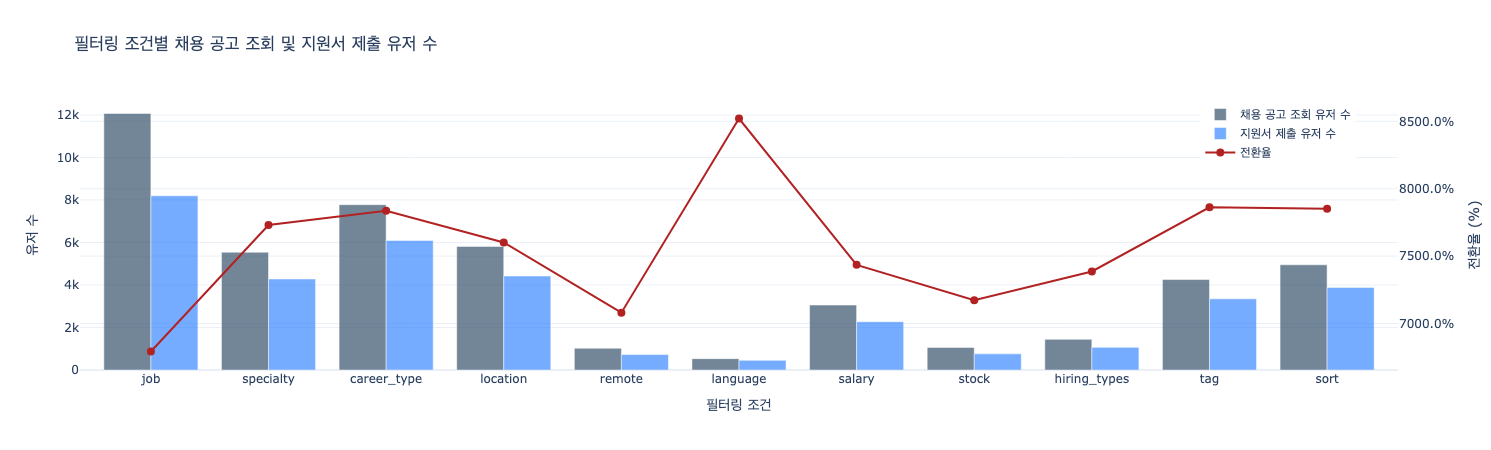

#### 6-4-2. 필터링 조건별 선호도 랭킹 시각화

- 각 필터링 조건의 **선호도**를 내림차순으로 정렬하여 바 그래프로 표현한 것임.
- 각 필터 조건별 사용 선호도를 시각화하여 유저가 특정 조건을 얼마나 자주 사용하는지 파악할 수 있도록 함

- **필터링 조건**: x축에 각 필터링 조건이 표시되어 있으며, 이를 통해 필터의 종류를 쉽게 확인할 수 있음
- **필터링 선호도 (%)**: y축에는 필터 사용률이 %로 표현되어 있으며, 바 그래프의 높이로 각 필터의 선호도를 시각적으로 나타냄
- **순위 표시**: 각 필터 조건에 대해 필터링 선호도 순위도 계산하였으며, 그래프 상에 텍스트로 표시하여, 필터링 선호도를 쉽게 이해할 수 있음

In [ ]:
# 필터링 선호도를 기준으로 내림차순 정렬 및 순위 매기기
results_df = results_df.sort_values(by='필터링 선호도 (%)', ascending=False).reset_index(drop=True)
results_df['필터링 선호도 순위'] = results_df.index + 1  # 순위 컬럼 추가

# 필터링 선호도 시각화
fig = px.bar(
    results_df,
    x='필터링 조건',
    y='필터링 선호도 (%)',
    text='필터링 선호도 (%)',
    title='필터링 조건별 선호도 랭킹',
    labels={'필터링 조건': '필터링 조건', '필터링 선호도': '필터링 선호도 (%)'},
    color='필터링 선호도 (%)',
    color_continuous_scale=px.colors.sequential.Teal
)

# 텍스트 표시 및 레이아웃 조정
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis=dict(title='필터링 조건', tickangle=45),
    yaxis=dict(title='필터링 선호도 (%)'),
    template='plotly_white'
)

fig.show()

출력 결과:

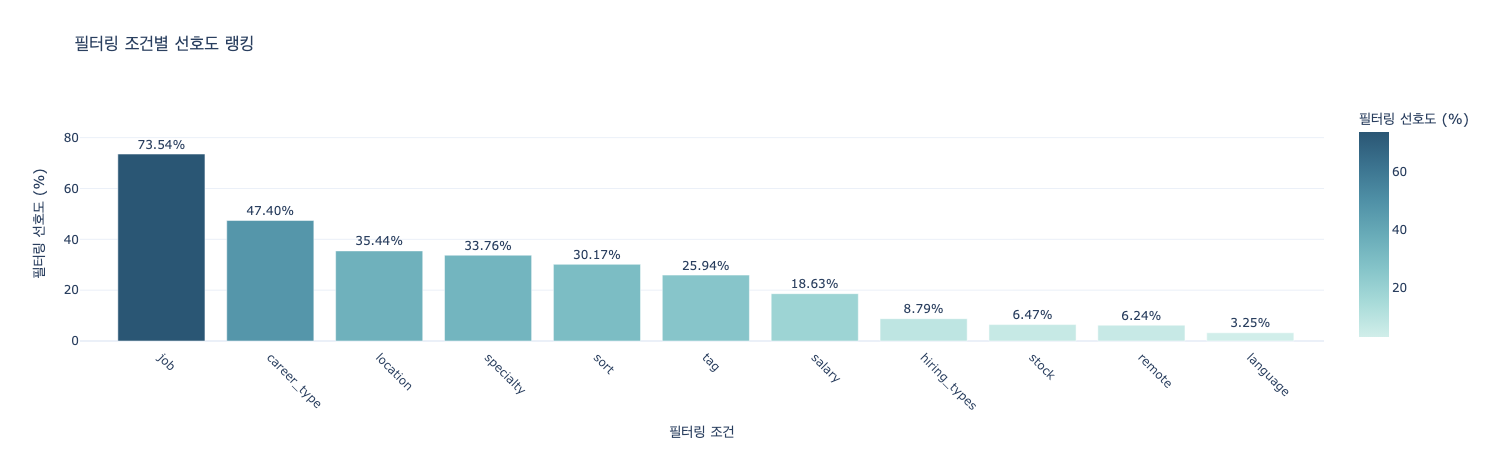

#### 6-4-3. 필터링 조건별 전환율 랭킹 시각화

- 각 필터링 조건에 따른 **전환율**을 내림차순으로 정렬하여 바 그래프로 표시한 것임

- 각 필터 조건에 대해 사용자가 조회 이후 지원서 제출로 이어지는 비율을 시각적으로 파악할 수 있게 구성함

- **필터링 조건**
    - x축에는 분석에 사용된 각 필터 조건이 표시되어 있으며, 이로써 전환율이 높은 필터를 쉽게 비교 가능함
- **전환율 (%)**
    - y축에는 전환율이 %로 표시되어, 바 그래프의 높이로 각 필터 조건의 전환율을 시각적으로 표현
- **순위 표시**
    - 각 필터 조건별 전환율 순위를 텍스트로 추가하여, 조건별 전환율의 우선순위를 쉽게 이해할 수 있도록 함

In [ ]:
# 전환율 기준으로 내림차순 정렬 및 순위 매기기
results_df = results_df.sort_values(by='전환율 (%)', ascending=False).reset_index(drop=True)
results_df['순위'] = results_df.index + 1  # 순위 컬럼 추가

# 전환율 시각화
fig = px.bar(
    results_df,
    x='필터링 조건',
    y='전환율 (%)',
    text='전환율 (%)',  # text를 '전환율 (%)'로 수정
    title='필터링 조건별 전환율 랭킹',
    labels={'필터링 조건': '필터링 조건', '전환율 (%)': '전환율 (%)'},
    color='전환율 (%)',
    color_continuous_scale=px.colors.sequential.Sunset
)

# 텍스트 표시 및 레이아웃 조정
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis=dict(title='필터링 조건', tickangle=45),
    yaxis=dict(title='전환율 (%)'),
    template='plotly_white'
)

fig.show()

출력 결과:

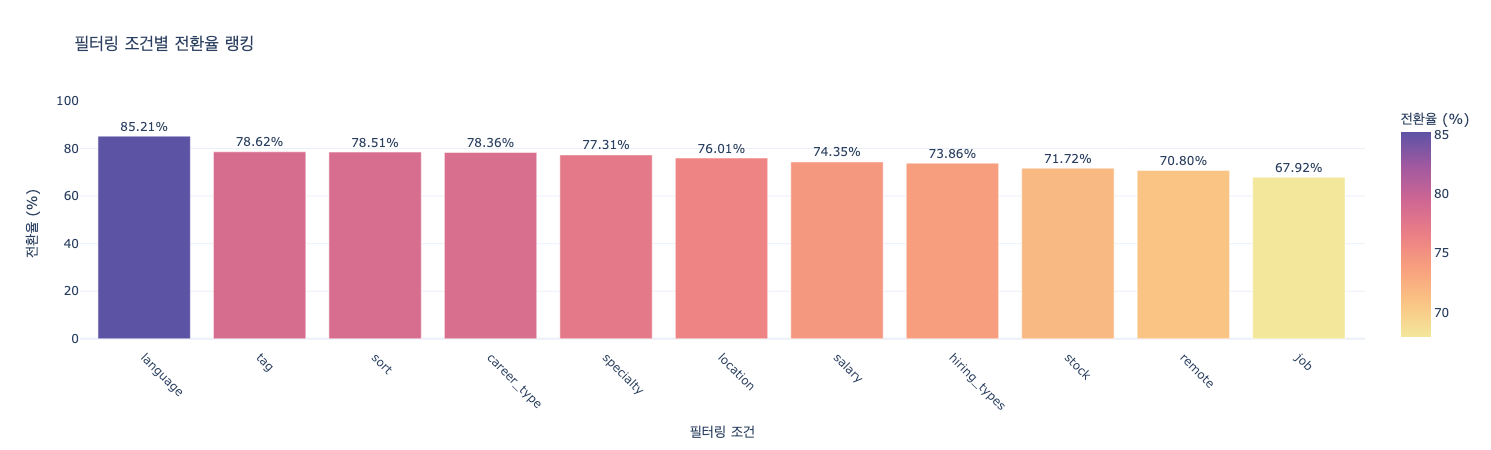

# **7. A/B테스트의 UI변경을 위한 사용자의 필터 클릭 전환 시간 분석**
---

### 7-1. 클릭 간 시간 차이 계산

각 유저의 클릭 이벤트 간 시간 차이를 계산하여 사용자 행동 패턴을 분석함.

1. **타임스탬프 컬럼 변환**:
   - `timestamp` 컬럼을 datetime 형식으로 변환하여 이후 시간 차이를 계산할 수 있도록 준비함

2. **데이터 정렬**:
   - `user_uuid`와 `timestamp` 기준으로 데이터를 정렬하여, 각 유저의 클릭 순서대로 시간 데이터를 정리함. 이를 통해 각 유저가 클릭한 시간 순서대로 데이터를 배열함으로써, 시간 차이 계산의 기반을 마련함

3. **유저별 클릭 간 시간 차이 계산**:
   - `groupby('user_uuid')`를 통해 각 유저별로 그룹화한 후, `diff()` 함수를 사용하여 각 클릭 간의 시간 차이를 `time_diff` 컬럼에 저장함. 이 `time_diff` 컬럼은 같은 유저가 다음 클릭을 수행하기까지 걸린 시간을 나타냄

In [ ]:
# timestamp 컬럼을 datetime 형식으로 변환
cleaned_logs_df['timestamp'] = pd.to_datetime(cleaned_logs_df['timestamp'])

# user_uuid와 timestamp를 기준으로 데이터 정렬
cleaned_logs_df = cleaned_logs_df.sort_values(by=['user_uuid', 'timestamp'])

# 각 유저별로 클릭 간 시간 차이 계산
cleaned_logs_df['time_diff'] = cleaned_logs_df.groupby('user_uuid')['timestamp'].diff()

### 7-2. 1분 이상인 시간 차이 데이터 제거 및 평균 클릭 간 시간 차이 계산

1분 이상 간격이 있는 클릭을 제외한 후, 각 유저의 평균 클릭 간 시간 차이를 계산하여 사용자 행동을 세부적으로 분석함

1. **1분 이상의 시간 차이 데이터 제거**:
   - `time_diff`가 1분 이상인 데이터를 필터링하여 제거함. 이렇게 함으로써, 주로 짧은 간격으로 일어나는 클릭 이벤트만 남기고, 이탈이나 휴식으로 인한 긴 간격은 제외함
   - 결과적으로 서비스 이용 중의 실제 사용 데이터를 중심으로 분석 가능

2. **유저별 평균 클릭 간 시간 차이 계산**:
   - 필터링된 데이터에서 `user_uuid`를 기준으로 그룹화하여 각 유저별 평균 클릭 간 시간 간격을 계산함
   - `filtered_average_time_diff_per_user` 데이터프레임에 저장된 `average_click_interval`은 각 유저의 평균 클릭 간 시간을 나타냄

3. **전체 평균 클릭 간 시간 차이 계산**:
   - `average_click_interval`의 전체 평균을 계산하여 모든 유저의 일반적인 클릭 간 시간 간격을 파악함
   - 이는 서비스 이용의 일반적인 흐름을 이해하는 데 도움이 되며, 유저의 행동 패턴이 빠른지, 느린지 등을 비교하는 지표로 사용할 수 있음

In [ ]:
# 1분 이상인 시간 차이 데이터 제거
filtered_logs_df = cleaned_logs_df[cleaned_logs_df['time_diff'] < pd.Timedelta(minutes=1)]

# 필터링된 데이터로 각 유저별 평균 클릭 간 시간 차이 계산
filtered_average_time_diff_per_user = filtered_logs_df.groupby('user_uuid')['time_diff'].mean().reset_index()
filtered_average_time_diff_per_user.rename(columns={'time_diff': 'average_click_interval'}, inplace=True)

filtered_average_time_diff_per_user['average_click_interval'].mean()

Timedelta('0 days 00:00:06.679382176')

### 7-3. 특정 경로 패턴을 찾기 위한 사용자 클릭 흐름 추적

각 사용자별로 특정 경로 시퀀스를 찾아내고, 해당 시퀀스 내에서 발생한 클릭 간격(`interval`)을 기록하여 분석에 활용하기 위해 작성되었음

1. **목표 경로 설정**:
   - `start_path`: 시퀀스의 시작을 알리는 경로 (`'jobs'`)
   - `filter_path`: 시퀀스 내에서 연속적인 클릭 이벤트를 탐지할 경로 (`'api/jobs/job_title'`)

2. **유저별 데이터 그룹화 및 초기화**:
   - `user_uuid`별로 데이터를 그룹화하고 각 유저의 클릭 기록(`user_df`)을 순서대로 접근
   - `sequence_start`와 `previous_timestamp`를 통해 시퀀스의 시작과 클릭 간격을 추적할 수 있도록 초기화함

3. **경로 시퀀스 탐색**:
   - **시퀀스 시작 조건**: `current_path`가 `start_path`에 해당할 때 시퀀스 시작
     - `user_uuid`, `path`, `timestamp` 정보를 `new_data`에 저장하고 `interval`은 0으로 설정
   - **연속된 필터 경로 탐색**: 시퀀스가 시작된 상태에서 `current_path`가 `filter_path`와 일치하면, 현재 클릭 간의 시간 차이를 계산하여 `interval`로 저장
     - `previous_timestamp`를 갱신하여 다음 경로와의 시간 차이를 측정할 준비를 함
   - **시퀀스 종료 조건**: `filter_path`가 아닌 다른 경로로 이동 시
     - 마지막으로 경로의 클릭 간격을 저장하고 시퀀스를 종료

4. **결과 저장**:
   - `new_data` 리스트에 각 유저의 `user_uuid`, `path`, `timestamp`, 그리고 클릭 간 `interval`을 저장하여 분석에 활용할 수 있도록 함

In [ ]:
new_data = []

# 목표 경로 설정
start_path = 'jobs'
filter_path = 'api/jobs/job_title'

# 각 유저별로 jobs -> 연속된 api/jobs/job_title -> 다른 path 패턴을 찾기
for user, user_df in cleaned_logs_df.groupby('user_uuid'):
    user_df = user_df.reset_index(drop=True)
    sequence_start = None
    previous_timestamp = None  # 이전 경로의 timestamp를 저장할 변수

    for i in range(len(user_df)):
        current_path = user_df.loc[i, 'path']
        current_timestamp = user_df.loc[i, 'timestamp']

        if current_path == start_path:
            # 시퀀스 시작 시각 및 초기 설정
            sequence_start = i
            previous_timestamp = current_timestamp
            new_data.append({
                'user_uuid': user,
                'path': current_path,
                'timestamp': current_timestamp,
                'interval': pd.Timedelta(0)  # 처음 시작이므로 interval은 0
            })

        elif sequence_start is not None and current_path == filter_path:
            # 연속된 'api/jobs/job_title'에 대한 interval 계산
            interval_time = current_timestamp - previous_timestamp
            new_data.append({
                'user_uuid': user,
                'path': current_path,
                'timestamp': current_timestamp,
                'interval': interval_time
            })
            # 현재 timestamp를 이전 timestamp로 갱신
            previous_timestamp = current_timestamp

        elif sequence_start is not None and current_path != filter_path:
            # 다른 경로가 나왔을 때 마지막 interval 기록 및 시퀀스 종료
            interval_time = current_timestamp - previous_timestamp
            new_data.append({
                'user_uuid': user,
                'path': current_path,
                'timestamp': current_timestamp,
                'interval': interval_time
            })
            # 시퀀스 종료
            break

### 7-4. 유저별 평균 및 전체 평균 계산값 출력

`new_data`를 바탕으로 새로운 DataFrame을 생성하고, 특정 조건에 맞춰 데이터를 필터링한 후 사용자별 클릭 간 평균 간격을 계산함

1. **DataFrame 생성 및 초기 필터링**:
   - `new_data`를 기반으로 새로운 `DataFrame`인 `new_df`를 생성하여 분석 준비
   - `path`가 `'api/jobs/job_title'`에 해당하지 않는 인덱스를 삭제하여 분석 대상 경로만 남김
   - `interval`이 10분 이상인 인덱스 또한 제거하여, 클릭 간 간격이 비정상적으로 긴 데이터를 제외

2. **사용자별 평균 클릭 간격 계산**:
   - `user_uuid`별로 `interval`의 평균을 구하여 사용자별 평균 클릭 간격(`user_avg_intervals`)을 계산함
   - **전체 평균 계산**: `user_avg_intervals`의 `interval` 평균값을 계산하여 전체 유저의 평균 클릭 간 간격(`overall_avg_interval`)을 도출

3. **전체 데이터에 대한 직접 평균 계산**:
   - 필터링된 `new_df`의 `interval` 평균을 계산하여 전체 클릭 간 평균 간격(`direct_overall_avg_interval`)을 계산함

In [ ]:
# 새로운 DataFrame 생성
new_df = pd.DataFrame(new_data)

# path가 api/jobs/job_title이 아닌 인덱스 삭제
new_df = new_df[new_df['path'] == 'api/jobs/job_title'].reset_index(drop=True)

# interval이 10분 이상인 인덱스 삭제
new_df = new_df[new_df['interval'] < pd.Timedelta(minutes=10)].reset_index(drop=True)

# 유저별 평균의 전체 평균 계산
user_avg_intervals = new_df.groupby('user_uuid')['interval'].mean().reset_index()
overall_avg_interval = user_avg_intervals['interval'].mean()

# 전체에 대한 인터벌 평균 계산
direct_overall_avg_interval = new_df['interval'].mean()

In [ ]:
# 유저별 interval 평균 후 평균 계산: 7.45초
print("유저별 interval 평균 후 평균 계산:", overall_avg_interval)

# 전체에 대한 interval 평균 계산: 10.31초
print("전체에 대한 interval 평균 계산:", direct_overall_avg_interval)

유저별 interval 평균 후 평균 계산: 0 days 00:00:07.451629564
전체에 대한 interval 평균 계산: 0 days 00:00:10.314842710
